# Tech Stocks Market Analysis and Prediction #

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

# For time stamps
from datetime import datetime
import math


### Importing Data using Yahoo Finance Library ###

In [17]:
# The tech stocks we'll use for this analysis
tech_list = ['GOOG', 'MSFT', 'AMZN', 'AAPL', 'NVDA', 'TSLA', 'META', 'ORCL', 'INTC', 'CSCO']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)  # Recovering historical data for the last 2 years for each stock

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [GOOG, MSFT, AMZN, AAPL, NVDA, TSLA, META, ORCL, INTC, CSCO]
company_name = ["GOOGLE", "MICROSOFT", "AMAZON", "APPLE", "NVIDIA", "TESLA", "META", "ORACLE", "INTEL", "CISCO"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
num_companies = len(company_list)
num_cols = 2
num_rows = math.ceil(num_companies / num_cols)

df = pd.concat(company_list, axis=0)
df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-06  108.135002  108.879997  106.510002  107.480003  107.357834   
2022-09-07  107.760002  110.989998  107.614998  110.480003  110.354424   
2022-09-08  109.180000  110.580002  108.059998  109.419998  109.295624   
2022-09-09  110.050003  112.000000  110.000000  111.779999  111.652946   
2022-09-12  111.989998  112.639999  110.930000  111.870003  111.742844   
...                ...         ...         ...         ...         ...   
2024-08-27   50.669998   50.840000   50.400002   50.709999   50.709999   
2024-08-28   50.450001   50.570000   49.410000   49.849998   49.849998   
2024-08-29   49.970001   50.820000   49.880001   50.389999   50.389999   
2024-08-30   50.549999   50.689999   50.070000   50.540001   50.540001   
2024-09-03   50.220001   50.500000   50.169998   50.459999   50.459999   

              Volume company_name  
Date                               
2022-09-06  20565100       GOOGLE  
2022-09-07  22987200       GOOGLE  
2022-09-08  21660700       GOOGLE  
2022-09-09  21732900       GOOGLE  
2022-09-12  19732900       GOOGLE  
...              ...          ...  
2024-08-27  10243900        CISCO  
2024-08-28  14571400        CISCO  
2024-08-29  16324100        CISCO  
2024-08-30  15615300        CISCO  
2024-09-03    994548        CISCO  

[5010 rows x 7 columns]

### Descriptive Data Statisitc ###

In [18]:
for company, com_name in zip(company_list, company_name):
    print(f'For Company: {com_name}')
    
    print("Genral information about:\n")
    print(company.info())
    
    print("Descriptive statistics:\n")
    print(company.describe())
    print("\n" + "="*80 + "\n")

For Company: GOOGLE
Genral information about:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-09-06 to 2024-09-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          501 non-null    float64
 1   High          501 non-null    float64
 2   Low           501 non-null    float64
 3   Close         501 non-null    float64
 4   Adj Close     501 non-null    float64
 5   Volume        501 non-null    int64  
 6   company_name  501 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.3+ KB
None
Descriptive statistics:

             Open        High         Low       Close   Adj Close  \
count  501.000000  501.000000  501.000000  501.000000  501.000000   
mean   129.992583  131.523431  128.741036  130.161926  130.037417   
std     28.141631   28.228953   28.025062   28.125915   28.131971   
min     85.510002   86.550003   83.449997   83.489998   83.395096   
25%  

### Close Price tracking ###
Closer time price tracking is crucial as it is an indicator of the performance of the stock which directly influences the prediction of stock

In [39]:
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add the adjusted close price of each company to the subplot
for i, company in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    fig.add_trace(
        go.Scatter(x=company.index, y=company['Adj Close'], mode='lines', name=company_name[i]),
        row=row, col=col
    )

# Update layout to adjust titles, size, etc.
fig.update_layout(
    title_text="Closing Prices of Tech Stocks",
    height=1200,
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
    for j in range(1, num_cols + 1):
        fig.update_yaxes(title_text="Adjusted Close Price", row=i, col=j)
    
# Show the interactive plot
fig.show()

### Volume of sales ###
the exchange of the quantity or amount of asset trtansfer per day can show how actively the stock is being sold or bought between different investors. it displays sentiment around the particular stock which influences buyers, it also indicates the liquidity as in whihch stock can be easily sold or bought.

In [20]:
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add the adjusted close price of each company to the subplot
for i, company in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    
    fig.add_trace(
        go.Scatter(x=company.index, y=company['Volume'], mode='lines', name=company_name[i]),
        row=row, col=col
    )

# Update layout to adjust titles, size, etc.
fig.update_layout(
    title_text="Volume of Tech Stocks",
    height=1200,
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
    for j in range(1, num_cols + 1):
        fig.update_yaxes(title_text="Sales volume", row=i, col=j)
    

# Show the interactive plot
fig.show()


### Implementing Moving average of the various Stocks ###
Moving average is a simple technique of registering cummilative avergaes over short period of time for identifying trends by smoothing out short term fluctuations and highlighting longe term trends. MA can act as a threshold or a baseline for prediction as a safer bet for the buyers as it can be used as buy or sell signals for daily traders. It also helps as a volatility measure as large deviation from MA can mean high volatility.

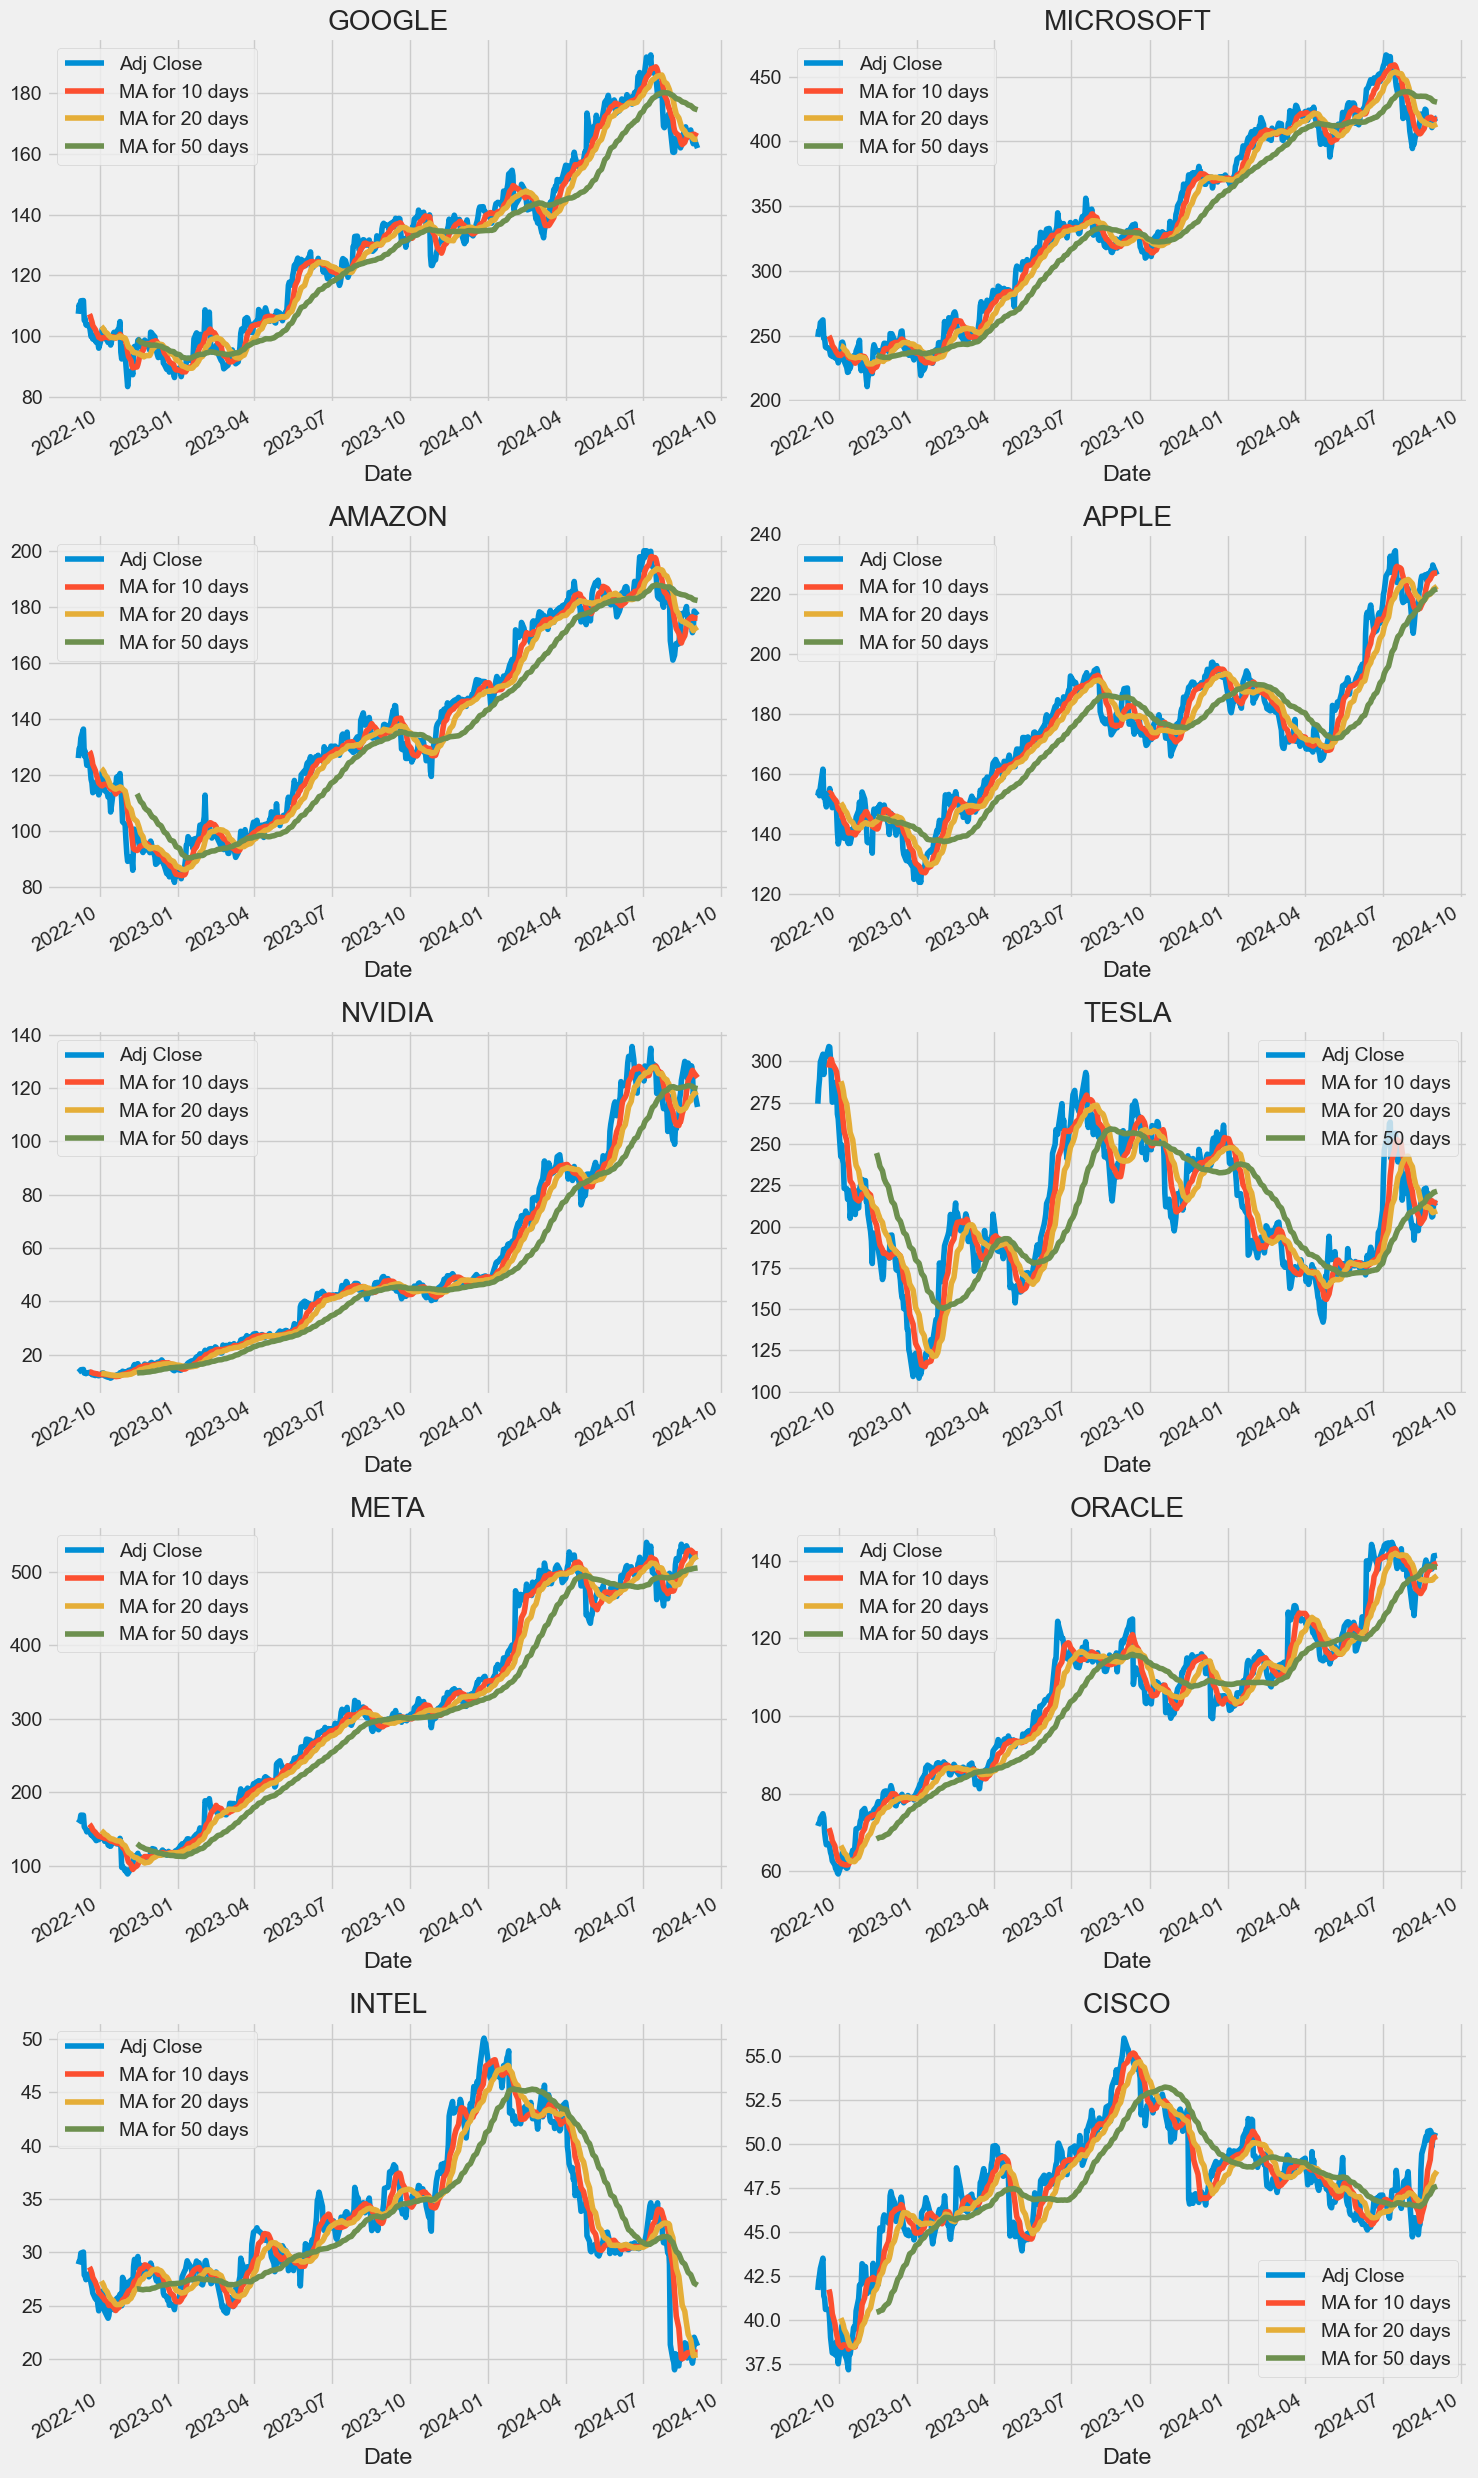

In [21]:
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    for company_df in company_list:
        column_name = f"MA for {ma} days"
        company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()



# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot data for each company
for ax, company_df, name in zip(axes, company_list, company_name):
    company_df[['Adj Close'] + [f"MA for {ma} days" for ma in ma_day]].plot(ax=ax)
    ax.set_title(name)

# Hide any unused subplots
for ax in axes[len(company_list):]:
    ax.set_visible(False)

# Adjust layout
fig.tight_layout()
plt.show()

# Daily Return of the stock #
In this section we are going to analyze the risk of the stocks. We will look at daily changes of the stock and not just the absolute values 

In [22]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add traces for each company dynamically
for i, company_df in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Scatter(
            x=company_df.index,
            y=company_df['Daily Return'],
            mode='lines+markers',
            name=company_name[i],
            line=dict(dash='dash'),
            marker=dict(symbol='circle')
        ),
        row=row, col=col
    )

# Update layout for better appearance
fig.update_layout(
    height=1200,
    width=1200,
    title_text="Daily Returns of Companies",
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Date", row=i, col=1)
    fig.update_xaxes(title_text="Date", row=i, col=2)
    
    for j in range(1, num_cols + 1):
        fig.update_yaxes(title_text="Daily Return", row=i, col=j)
    

# Show the interactive plot
fig.show()

In [23]:
# Create subplots with dynamic rows and columns
fig = make_subplots(
    rows=num_rows,
    cols=num_cols,
    subplot_titles=company_name
)

# Add histogram traces for each company dynamically
for i, company_df in enumerate(company_list):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Histogram(
            x=company_df['Daily Return'],
            nbinsx=50,
            name=company_name[i],
            hovertemplate=
                '<b>Company:</b> %{meta}<br>' +
                '<b>Daily Return:</b> %{x:.4f}<br>' +
                '<b>Count:</b> %{y}<extra></extra>',
            meta=company_name[i]
        ),
        row=row, col=col
    )

# Update layout for better appearance
fig.update_layout(
    height=1200,
    width=1200,
    title_text="Histogram of Daily Returns for Companies",
    showlegend=False,
    template="plotly_white"
)

# Update x-axis and y-axis labels for all subplots
for i in range(1, num_rows + 1):
    fig.update_xaxes(title_text="Daily Return", row=i, col=1)
    fig.update_xaxes(title_text="Daily Return", row=i, col=2)
    
    for j in range(1, num_cols + 1):
        fig.update_yaxes(title_text="Counts", row=i, col=j)
   

# Show the interactive plot
fig.show()

# Correaltion between different stocks closing price # 
Correlation measures the association instead of 'X' causing 'Y', it shows the effect caused by third factor

In [24]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Check the first few rows of the closing prices DataFrame
print(closing_df.head())

# Create a new DataFrame for tech returns by calculating the percentage change
tech_rets = closing_df.pct_change()

# Check the first few rows of the tech returns DataFrame
print(tech_rets.head())

tech_rets.dropna(inplace=True)

[*********************100%%**********************]  10 of 10 completed

Ticker            AAPL        AMZN       CSCO        GOOG       INTC  \
Date                                                                   
2022-09-06  152.836594  126.110001  41.719055  107.357834  28.885345   
2022-09-07  154.250946  129.479996  42.235027  110.354424  29.161263   
2022-09-08  152.767380  129.820007  42.563377  109.295624  29.256403   
2022-09-09  155.645493  133.270004  42.938637  111.652946  29.931915   
2022-09-12  161.639069  136.449997  43.529663  111.742844  30.027060   

Ticker            META        MSFT       NVDA       ORCL        TSLA  
Date                                                                  
2022-09-06  158.214874  248.958115  13.449852  71.639870  274.420013  
2022-09-07  160.061081  253.716080  13.702644  72.280273  283.700012  
2022-09-08  161.727661  254.138794  13.978415  72.435539  289.260010  
2022-09-09  168.803116  259.978119  14.375088  73.658165  299.679993  
2022-09-12  168.613525  262.131042  14.492988  74.793457  304.420013 

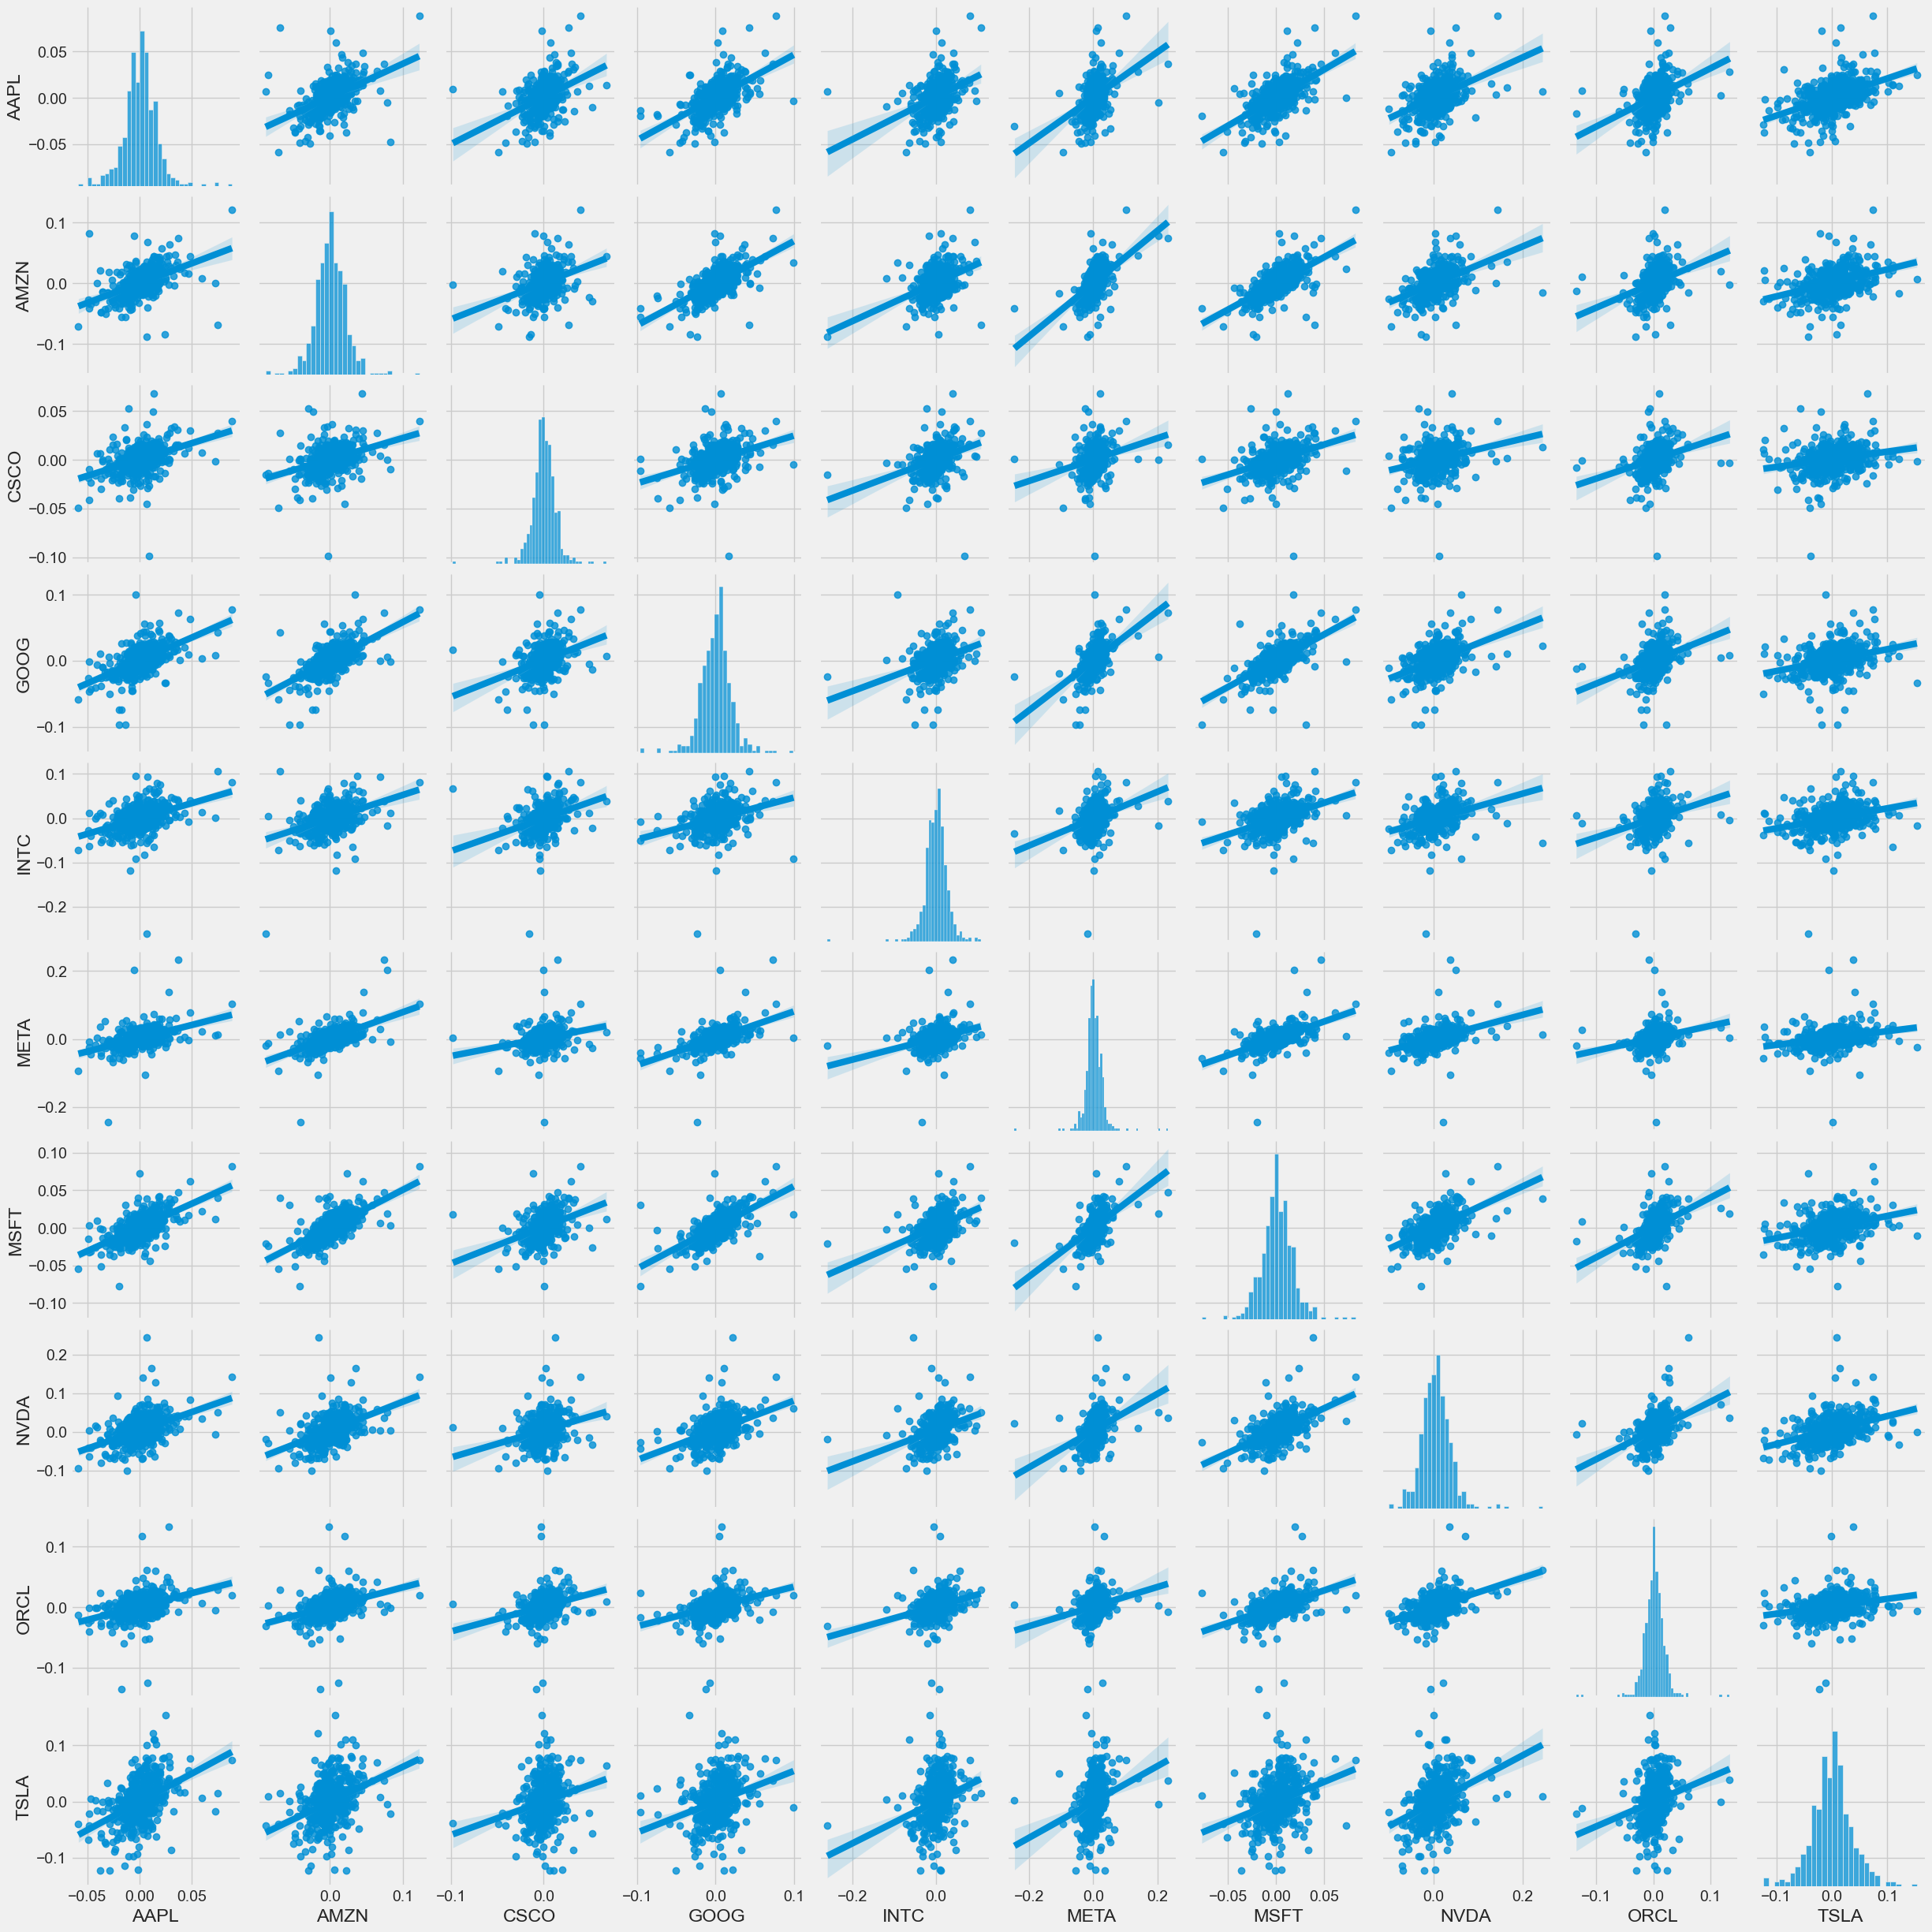

In [25]:

sns.pairplot(tech_rets, kind='reg')

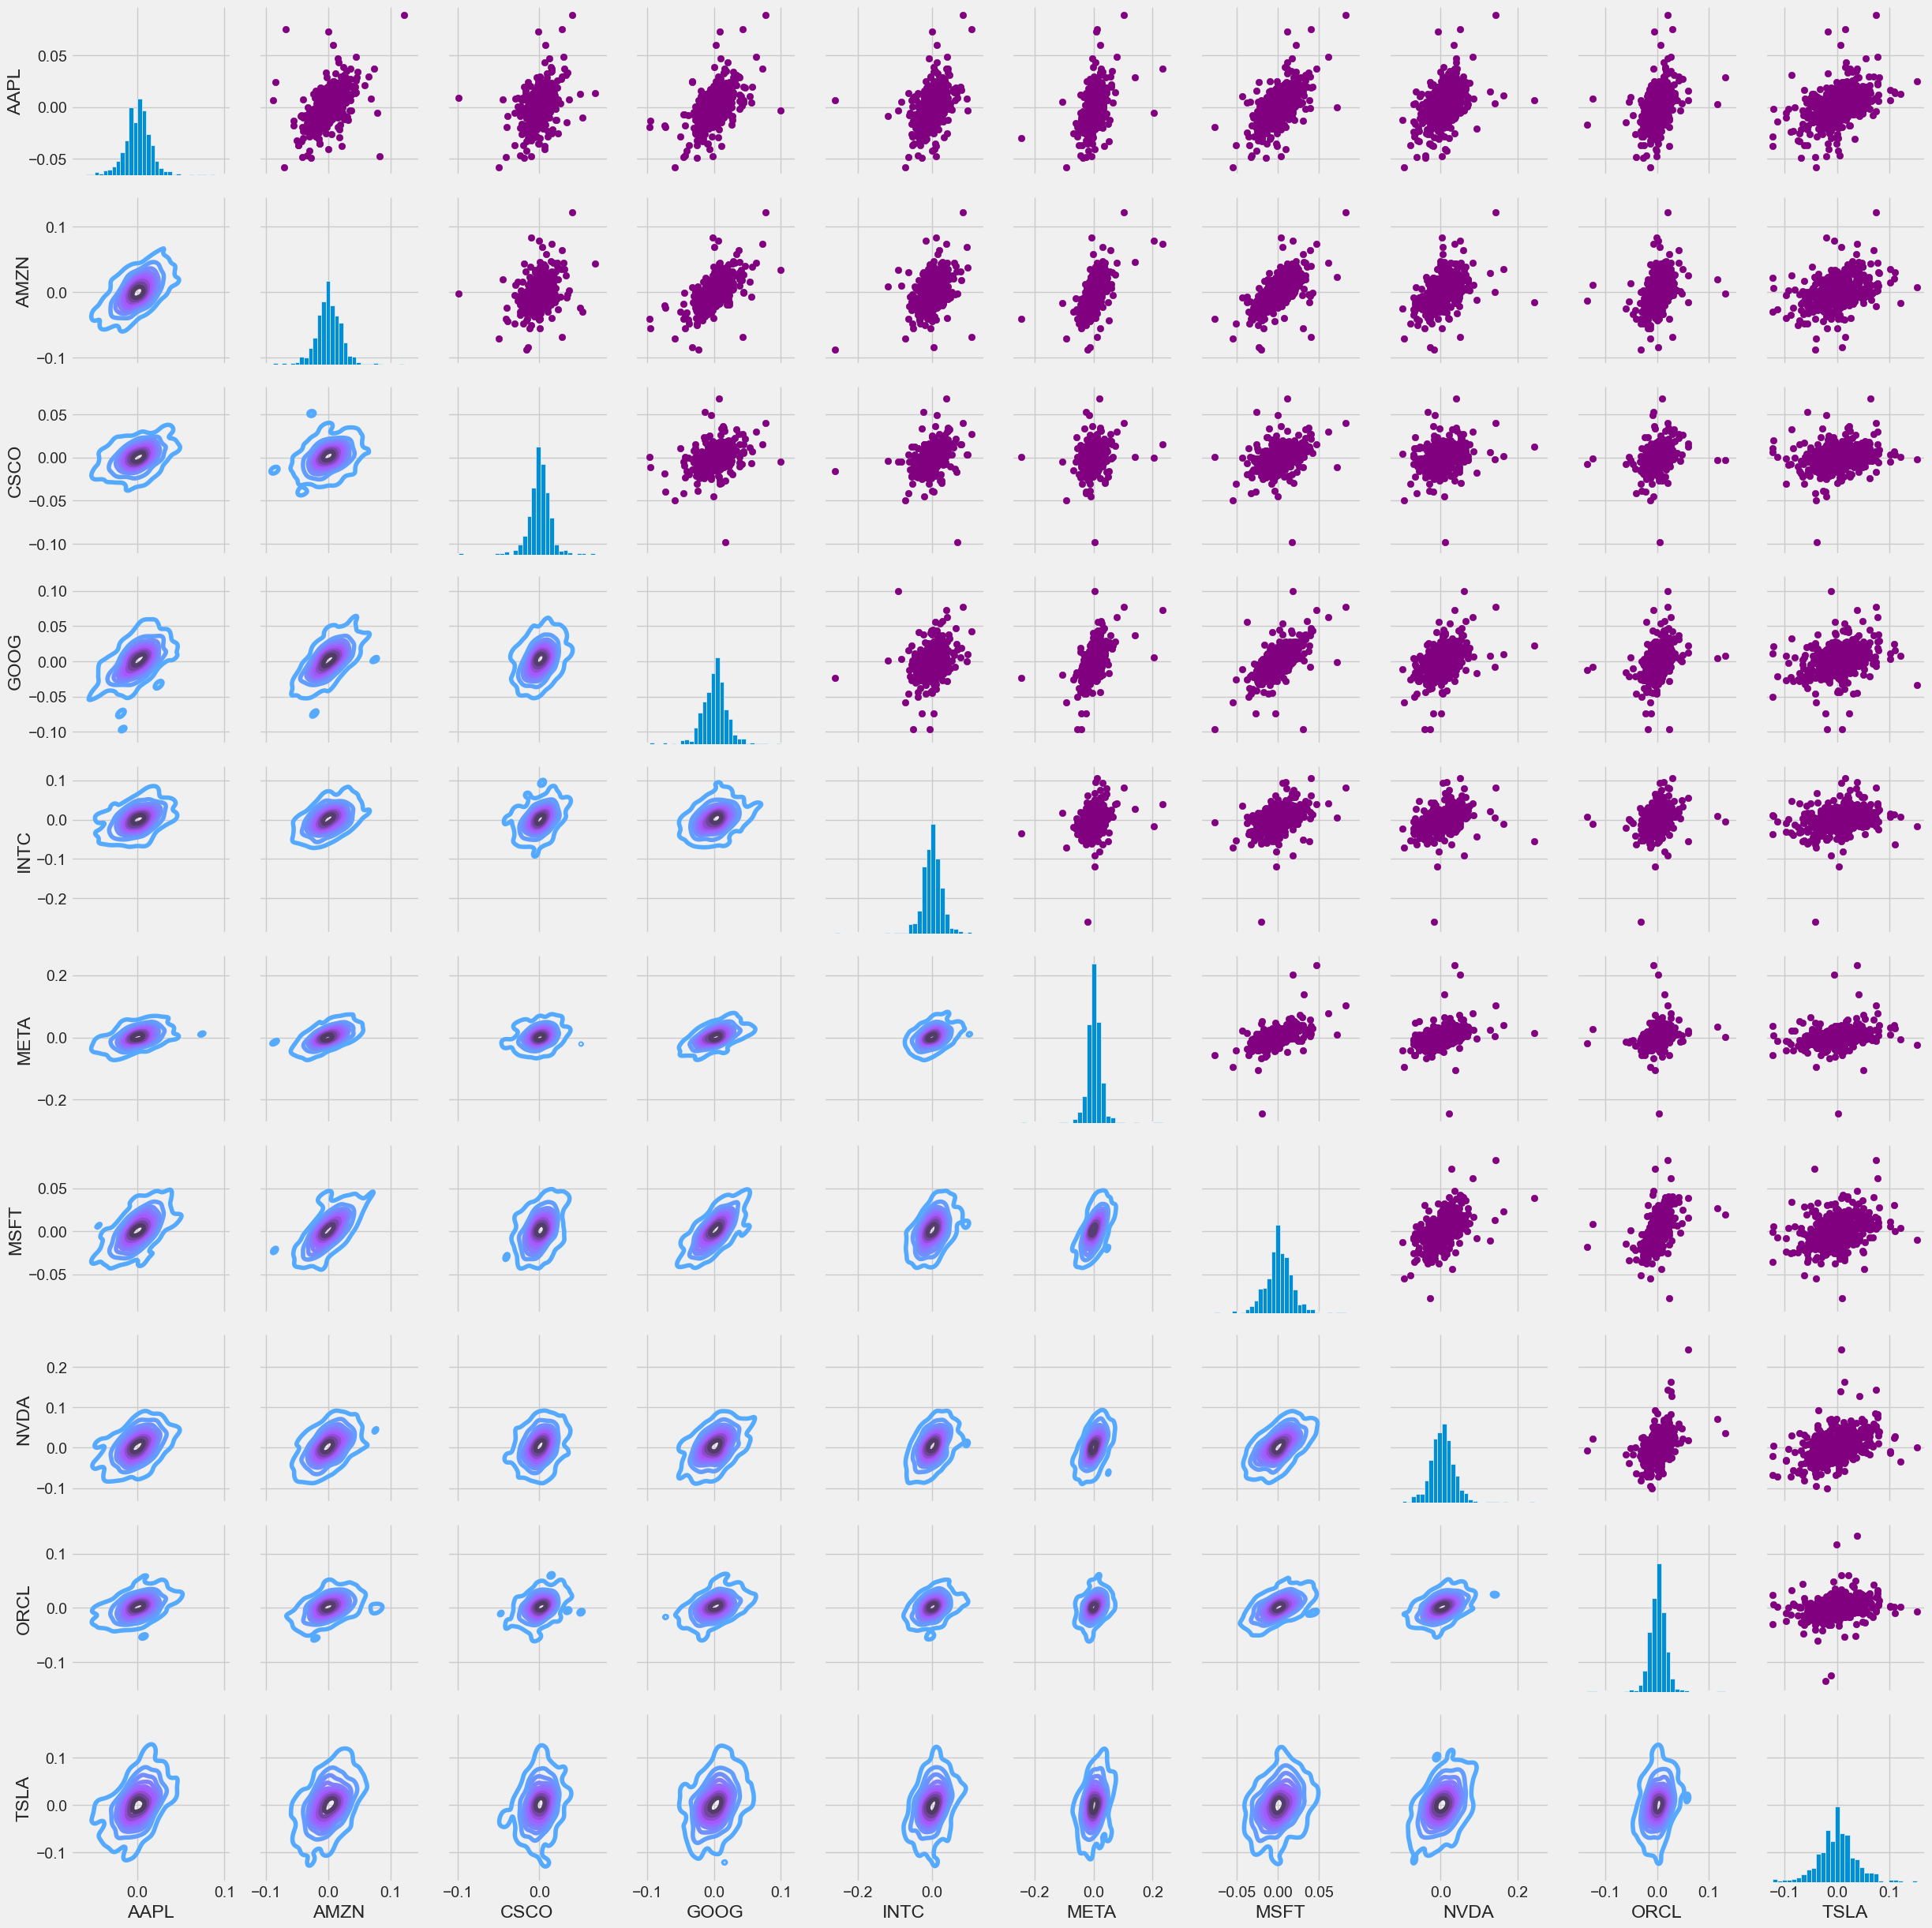

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

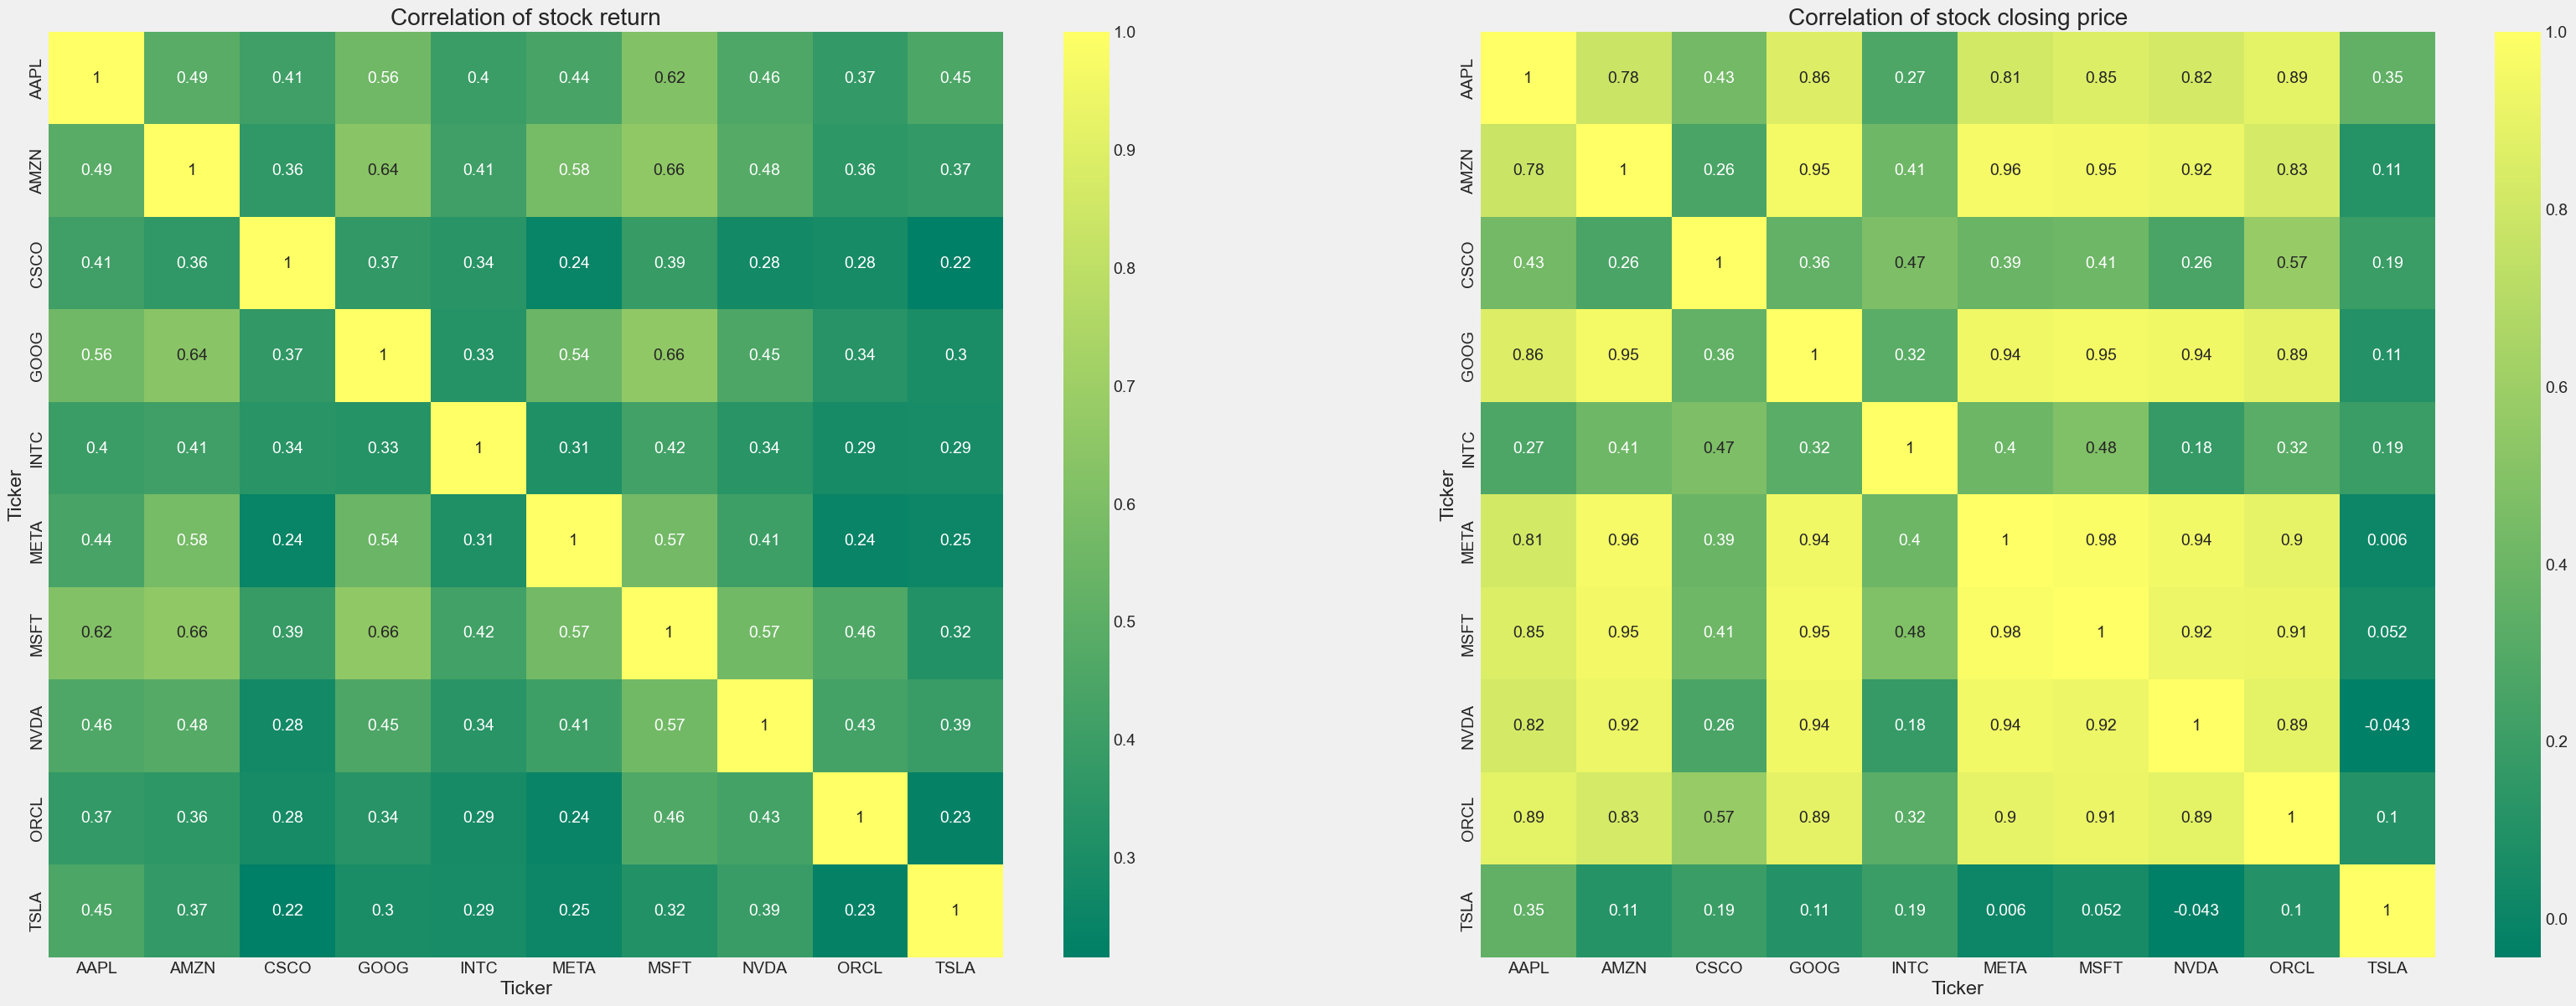

In [27]:
plt.figure(figsize=(36, 30))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Risk in investing in each company stock #
We can calculate the risk generated by comparing the expected return with the satndard deviation of the daily return. This is the basic method for risk calculation

In [34]:
rets = tech_rets.dropna()
area = (rets.std() * 100) ** 2  # Squaring to emphasize differences in risk

# Define the color scale for expected return over risk (standard deviation), from green (low return) to red (high return)
color_scale = [
    [0, 'red'],
    [0.5, 'yellow'],
    [1, 'green']
]

# Create a scatter plot
scatter = go.Scatter(
    x=rets.mean() * 100,  # Convert to percentage for x-axis
    y=rets.std() * 100,   # Convert to percentage for y-axis
    mode='markers+text',
    marker=dict(
        size=area,  # Use the calculated area for the marker size, scaled by risk
        sizemode='area',
        sizeref=2.*max(area)/(100.**2),  # Adjust size scaling for better visualization
        sizemin=4,
        color=(rets.mean()/rets.std()) * 100,  # Color by expected return
        colorscale=color_scale,  # Apply color scale
        colorbar=dict(
            title='Investment Graph'
        ),
        line=dict(width=1, color='black')
    ),
    text=rets.columns,
    textposition='top center',
    hovertemplate=
        '<b>%{text}</b><br>' +
        'Expected Return: %{x:.2f}%<br>' +
        'Risk (Std Dev): %{y:.2f}%<extra></extra>' 
)

# Layout for the plot
layout = go.Layout(
    title='Interactive Risk vs. Expected Return',
    xaxis=dict(title='Expected Return (%)'),
    yaxis=dict(title='Risk (Standard Deviation %)'),
    hovermode='closest',
    showlegend=False,
    height=700,
    width=900
)

# Create the figure
fig = go.Figure(data=[scatter], layout=layout)

# Show the interactive plot
fig.show()

# Training ML model to predict Close using sequential prediction #



_______________________________ 

 for stock: GOOGLE 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0191
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0026
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0028
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0019
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0016
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0014
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0014
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0012
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0013
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
RMSE: 2.9242559883026704


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



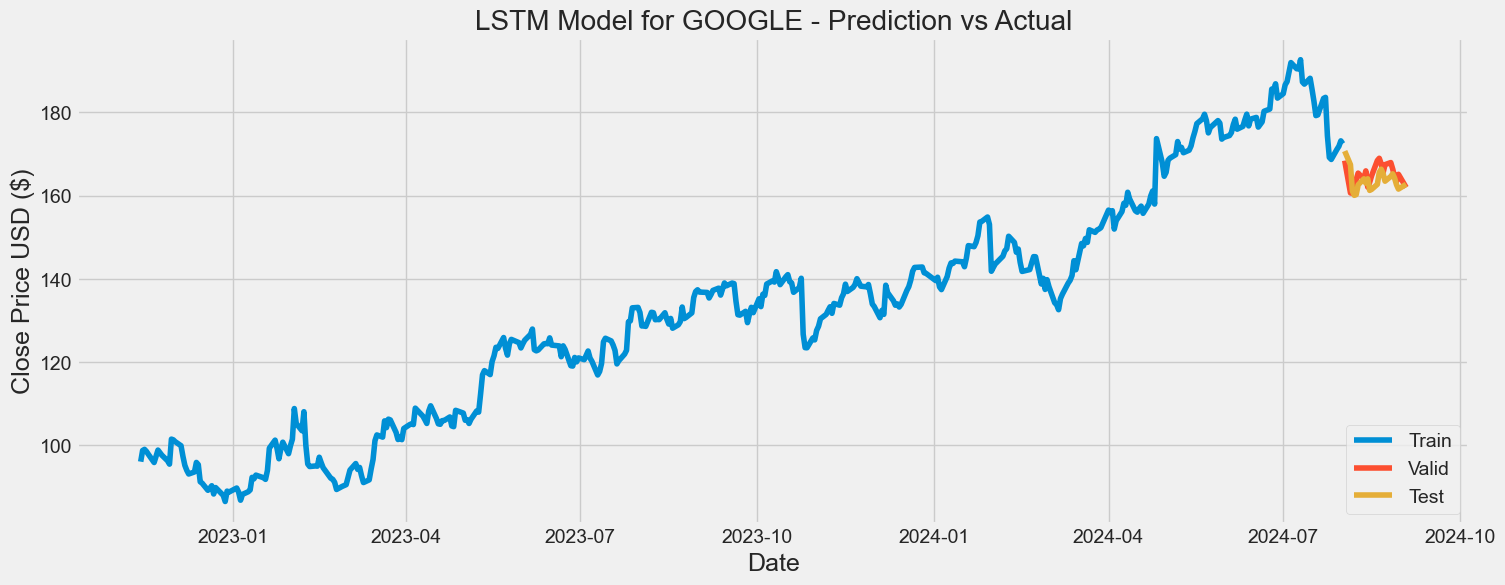



_______________________________ 

 for stock: MICROSOFT 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0169
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0017
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0019
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0018
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0013
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0011
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0014
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 8.3723e-04
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0010
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 7.2889e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
RMSE: 8.393876292054435


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



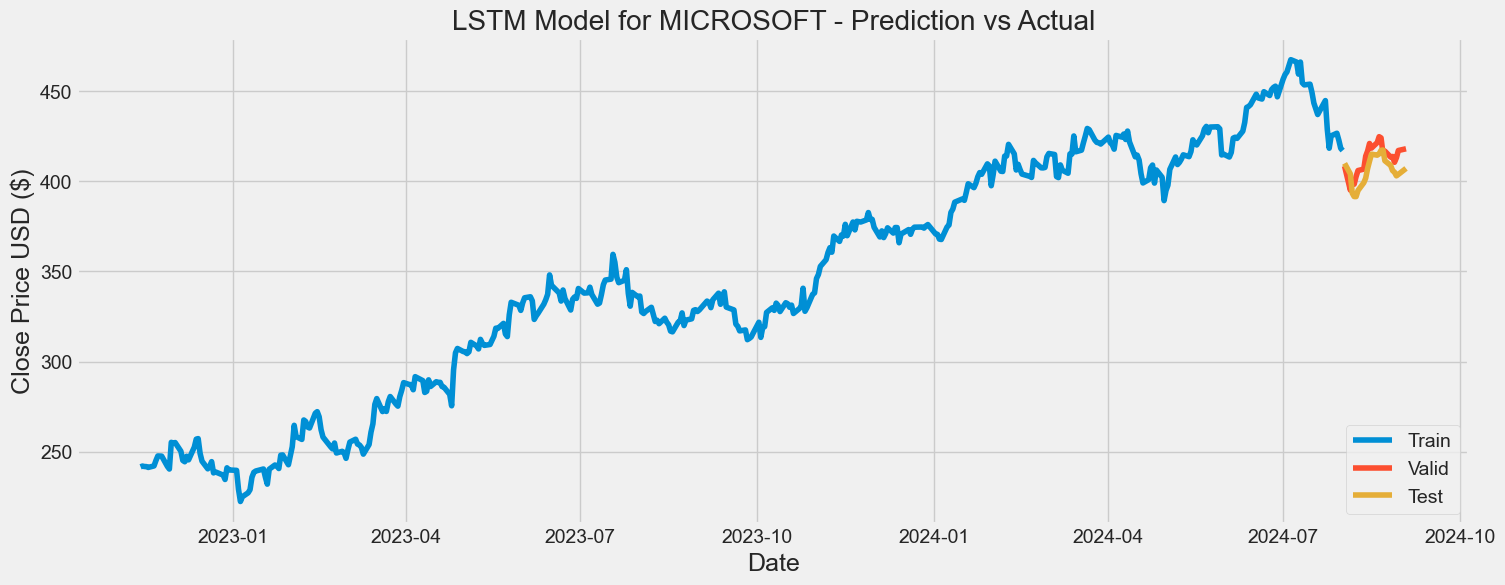



_______________________________ 

 for stock: AMAZON 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0180
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0028
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0020
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0019
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0021
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0013
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0011
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0012
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0013
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 7.2034e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
RMSE: 6.066891086105351


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



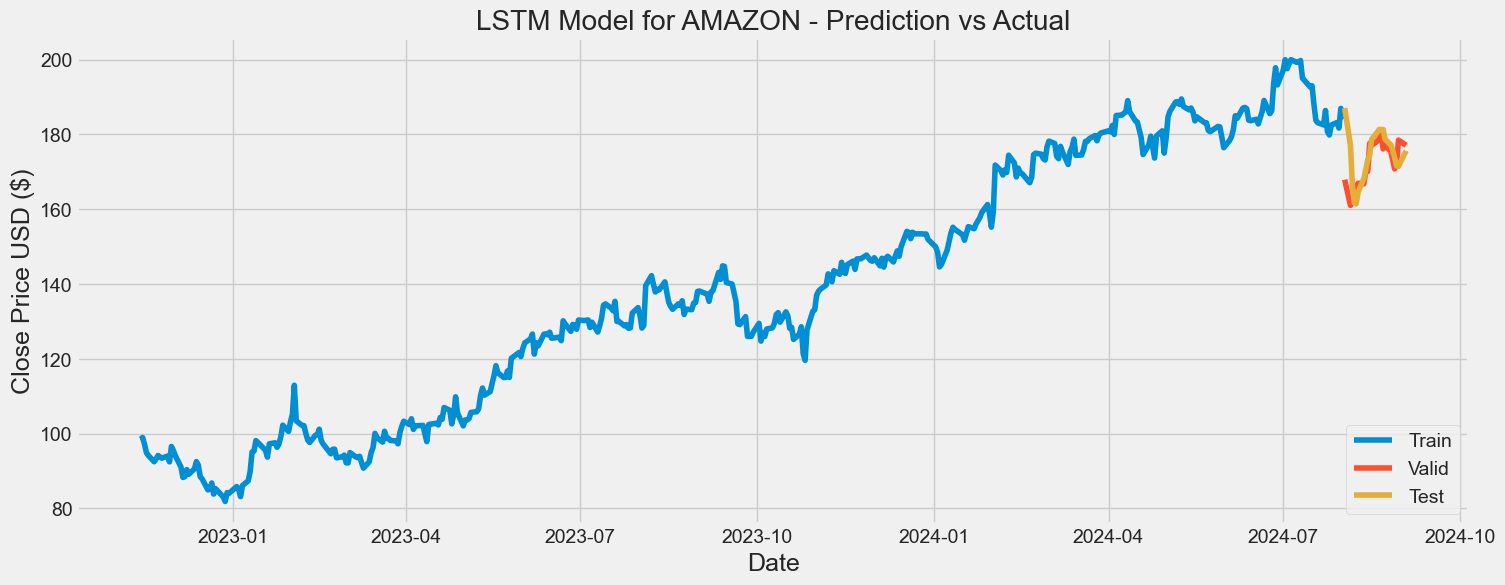



_______________________________ 

 for stock: APPLE 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0080
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0031
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0018
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0019
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0018
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0010
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0011
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0010
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 7.9213e-04
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 8.8392e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
RMSE: 2.999234011919882


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



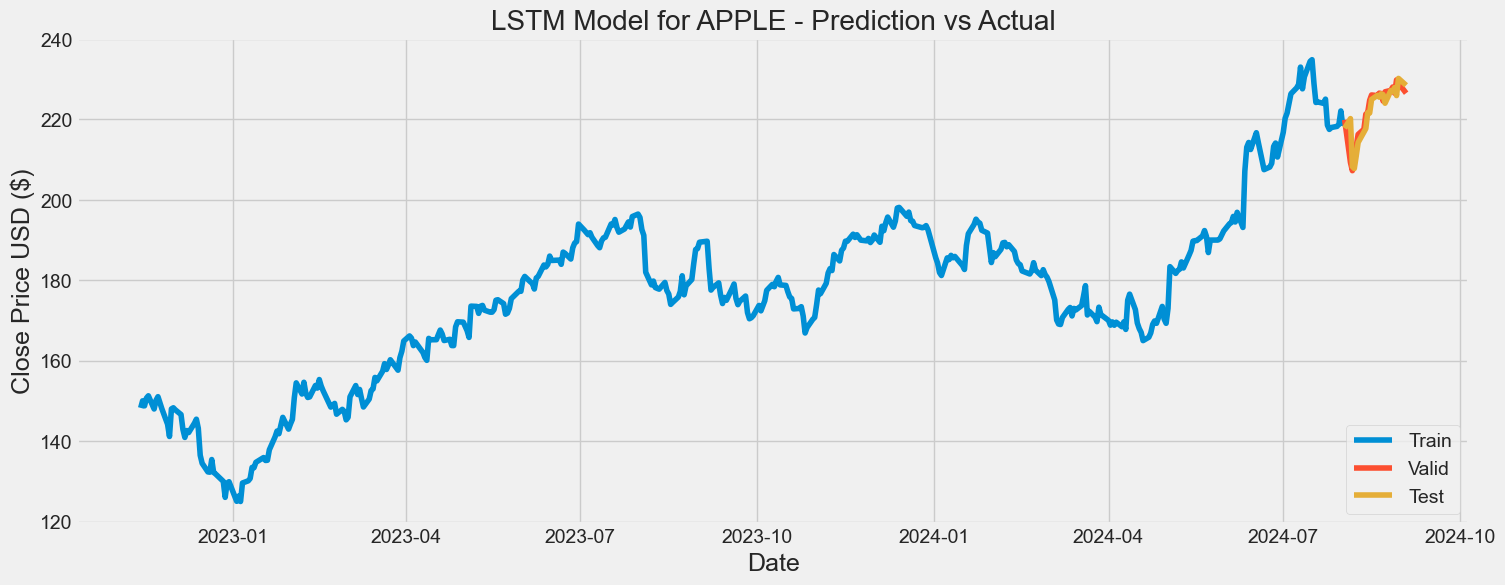



_______________________________ 

 for stock: NVIDIA 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0188
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0025
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0017
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0018
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0012
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0019
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 9.9218e-04
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.0010
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 9.2188e-04
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 8.3717e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
RMSE: 7.7771006524318045


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



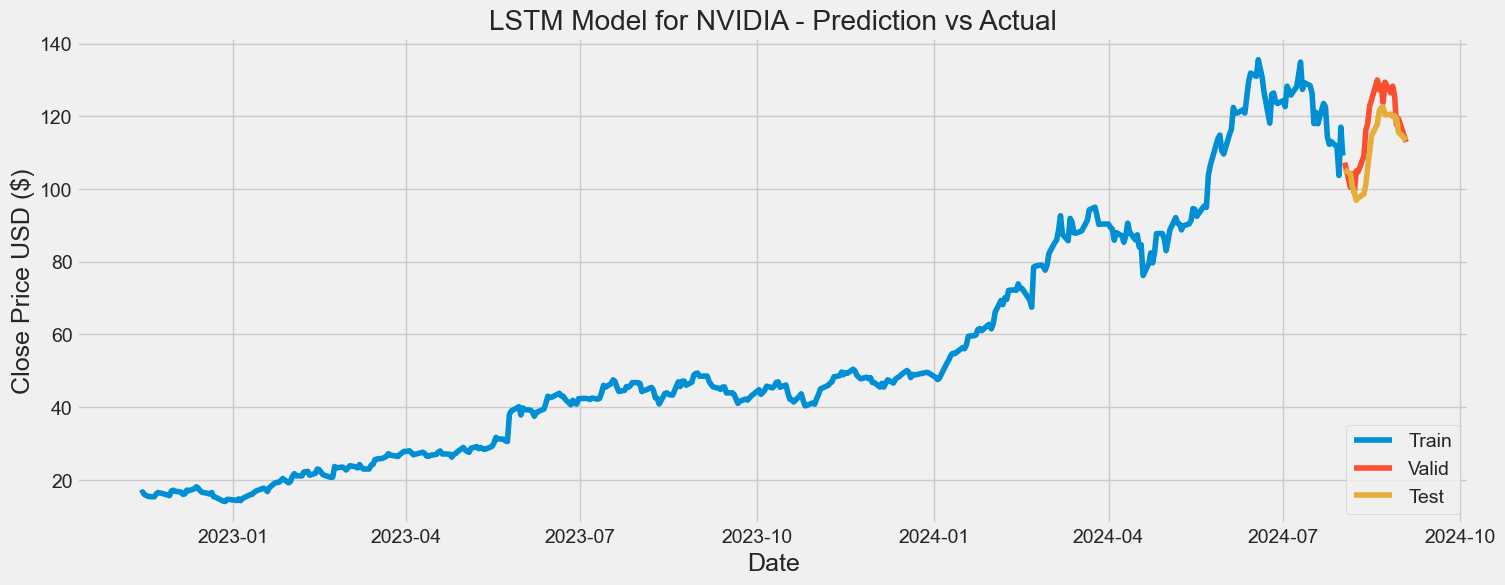



_______________________________ 

 for stock: TESLA 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.0225
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0047
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0034
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0025
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0024
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0029
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0022
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0025
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0025
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
RMSE: 9.419332350934463


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



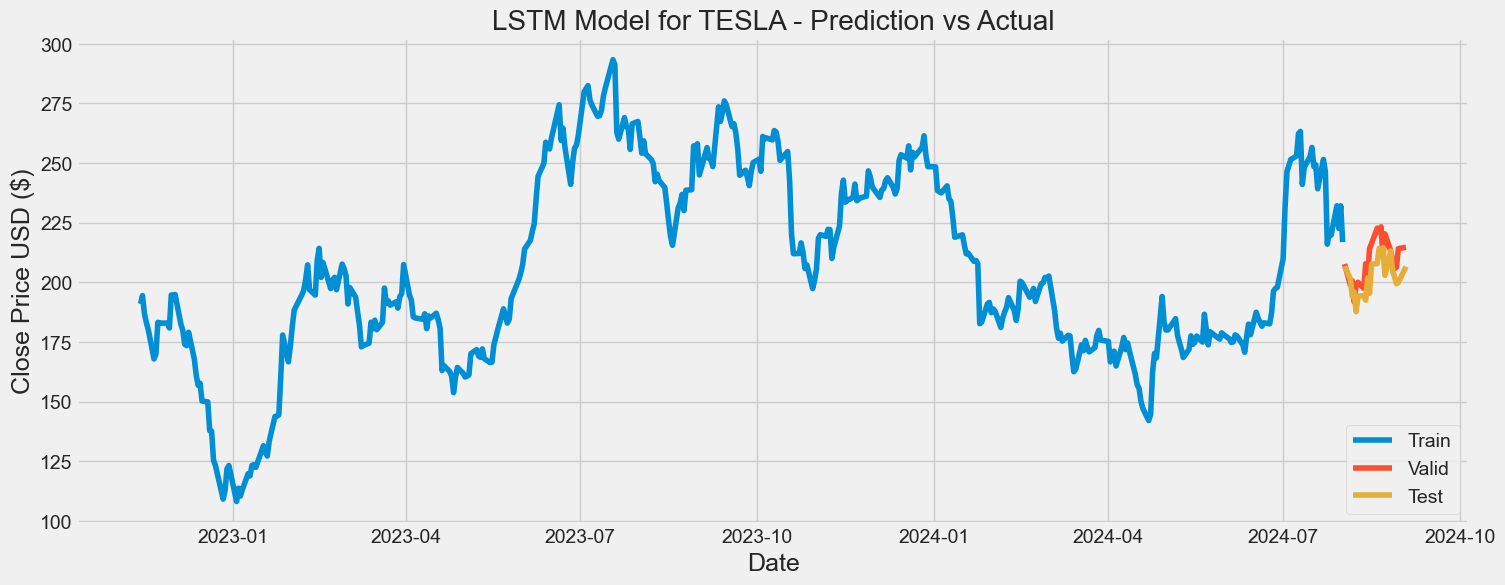



_______________________________ 

 for stock: META 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0132
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0026
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0022
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0022
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0016
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0013
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0017
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 8.9905e-04
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 7.4868e-04
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 8.4283e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
RMSE: 8.304857545014377


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



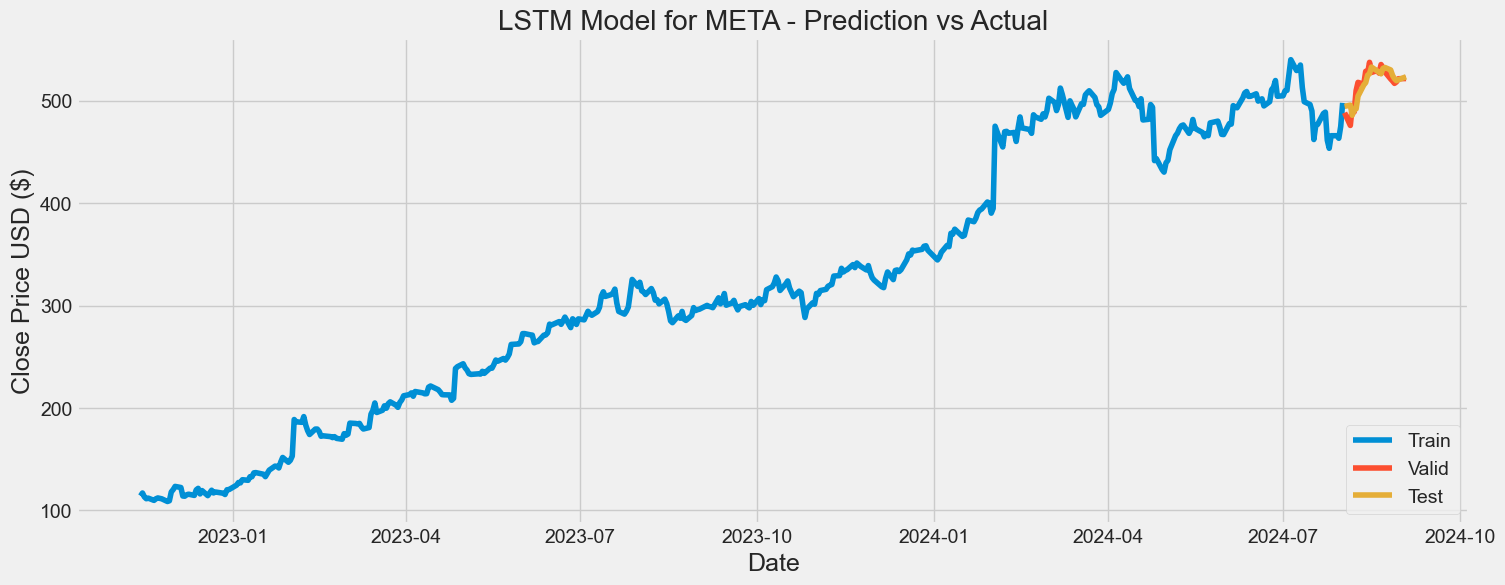



_______________________________ 

 for stock: ORACLE 

_______________________________


Training data length: 430


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 0.0124
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0051
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0035
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0030
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0029
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0023
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0017
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0014
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0015
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0023
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
RMSE: 4.223382369250056


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



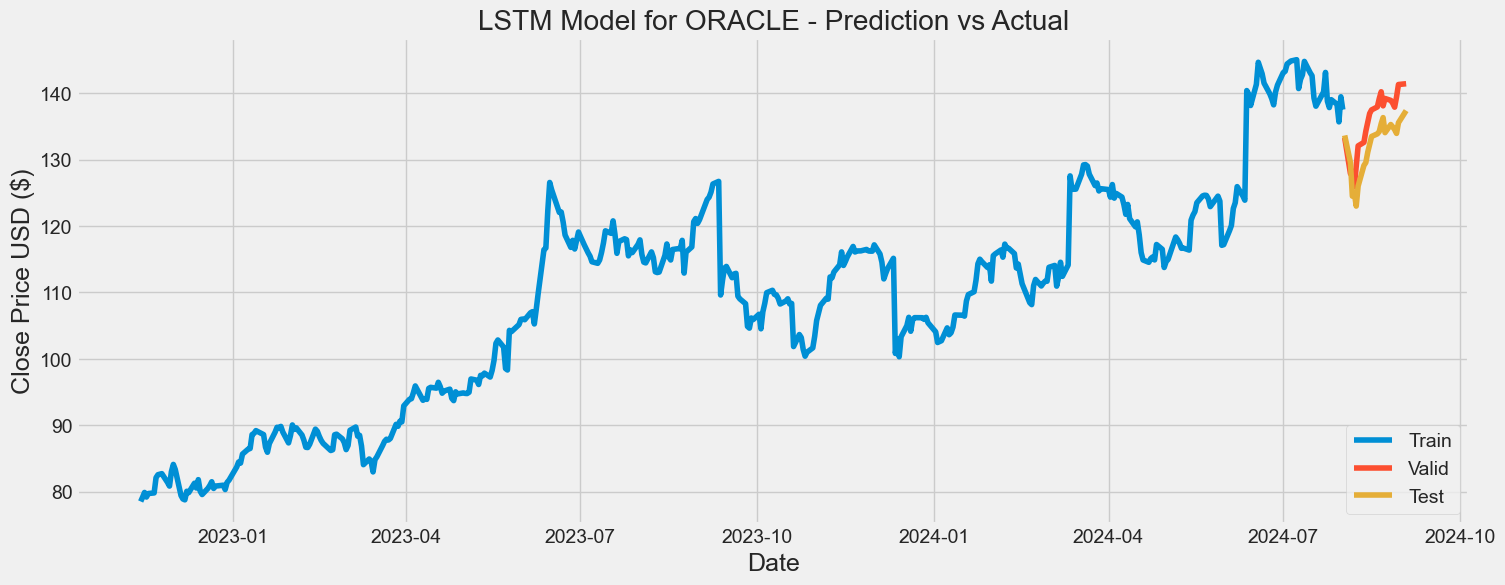



_______________________________ 

 for stock: INTEL 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0202
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0057
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0026
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0025
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0021
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0017
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0016
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0014
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0017
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
RMSE: 2.2291064083183327


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



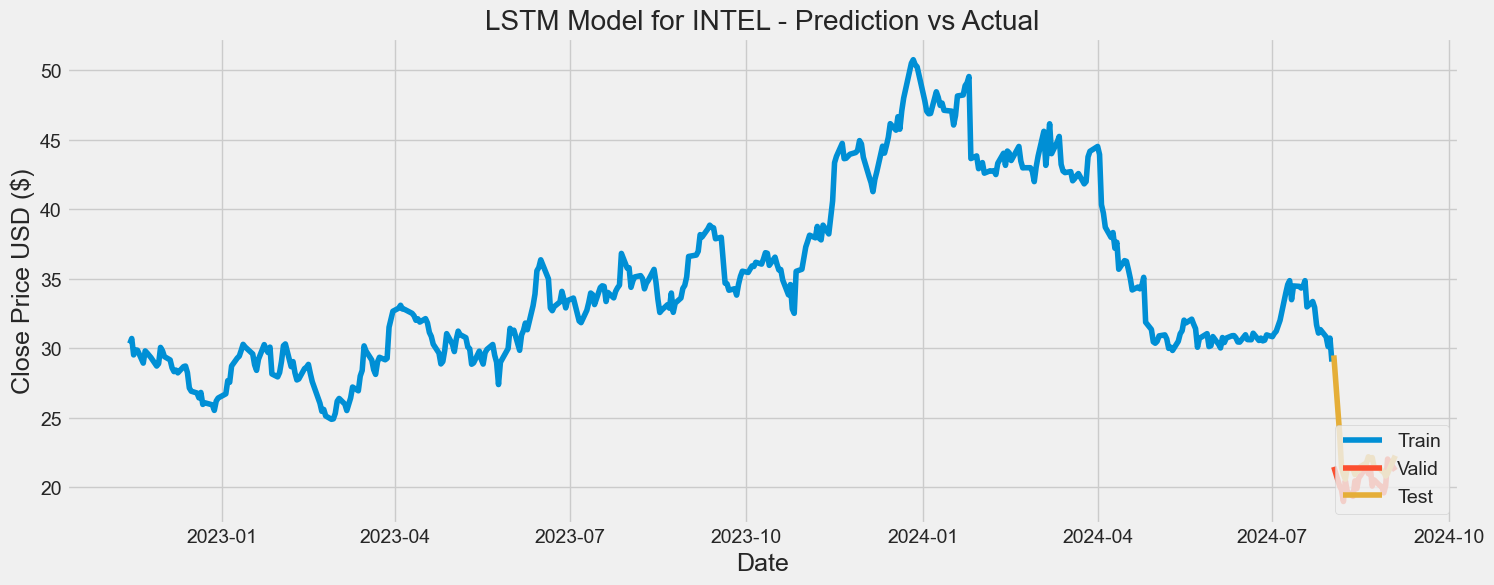



_______________________________ 

 for stock: CISCO 

_______________________________


Training data length: 430
Epoch 1/10


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0144
Epoch 2/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0075
Epoch 3/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0033
Epoch 4/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0032
Epoch 5/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0025
Epoch 6/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0038
Epoch 7/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0021
Epoch 8/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0030
Epoch 9/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0040
Epoch 10/10
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
RMSE: 0.9878335899429734


C:\Users\palaa\AppData\Local\Temp\ipykernel_29152\3081072183.py:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



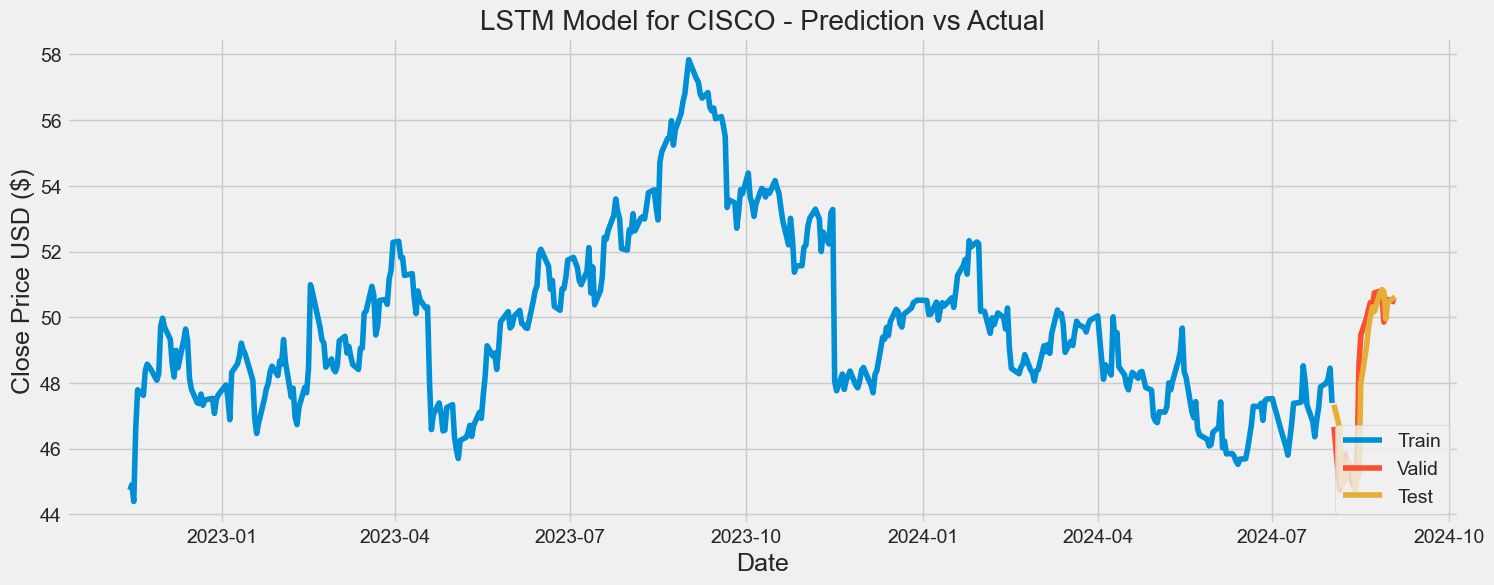

In [29]:
for stock_symbol, com_name in zip(company_list, company_name):
    print(f"\n\n_______________________________ \n\n for stock: {com_name} \n\n_______________________________\n\n")

    # Assuming stock_symbol is a DataFrame with columns including 'Close'
    df = pd.DataFrame(stock_symbol)
    df.dropna(inplace=True)

    # Create a new dataframe with only the 'Close' column
    data = df.filter(['Close'])

    # Convert the dataframe to a numpy array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))
    print(f"Training data length: {training_data_len}")

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Create the training data set
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    
    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)  # Adjust epochs as needed

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    # Convert the x_test data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get the model's predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
    print("RMSE:", rmse)

    # Prepare for plotting
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

    # Plot the data
    plt.figure(figsize=(16,6))
    plt.title(f'LSTM Model for {com_name} - Prediction vs Actual')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'], label='Train')
    plt.plot(valid[['Close']], label='Valid')
    plt.plot(valid[['Predictions']], label='Test')
    plt.legend(loc='lower right')
    plt.show()


 # Training ML model to predict Close using All the features #



_______________________________ 

 for stock: GOOGLE 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8424e-04 - val_loss: 0.0026
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5672e-04 - val_loss: 0.0027
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8237e-04 - val_loss: 0.0017
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5111e-04 - val_loss: 0.0017
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0337e-04 - val_loss: 0.0019
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7144e-04 - val_loss: 0.0011
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9845e-04 - val_loss: 0.0033
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

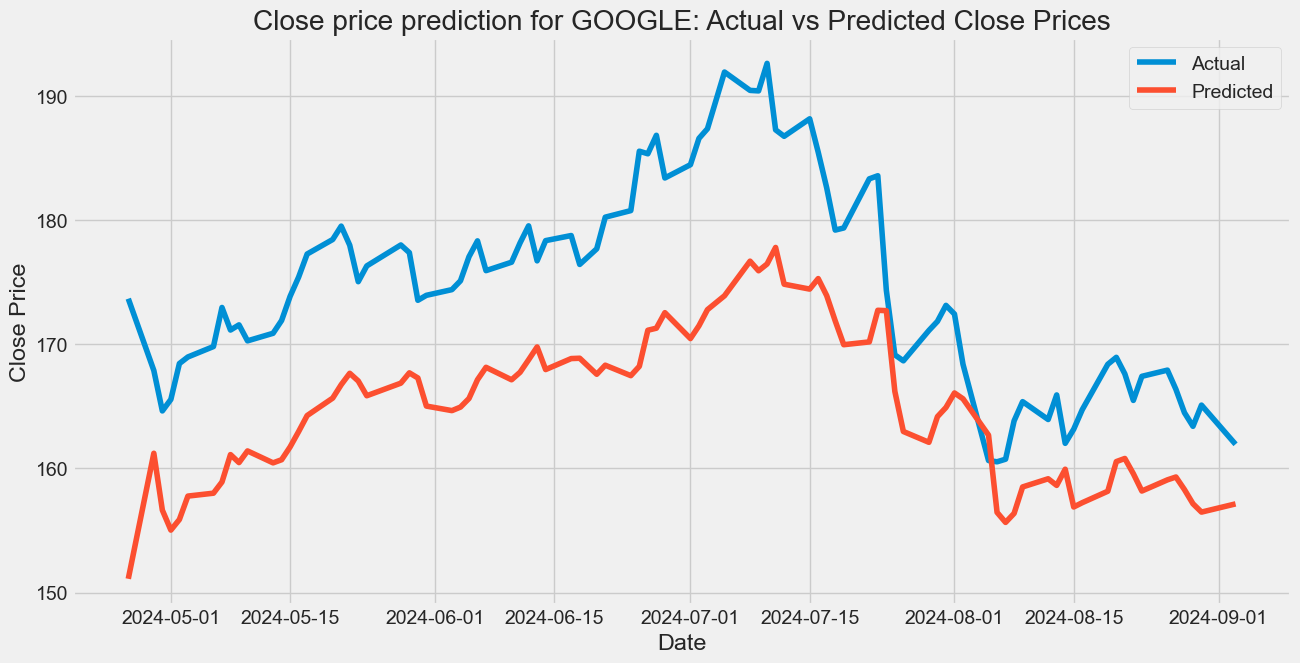



_______________________________ 

 for stock: MICROSOFT 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0281 - val_loss: 0.0032
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6527e-04 - val_loss: 0.0014
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2743e-04 - val_loss: 0.0019
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5399e-04 - val_loss: 0.0014
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5848e-04 - val_loss: 0.0011
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2014e-04 - val_loss: 0.0018
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2923e-04 - val_loss: 0.0010
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2601e-04 - val_loss: 0.0016
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1399e-04 - val_loss: 8.5836e-04
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

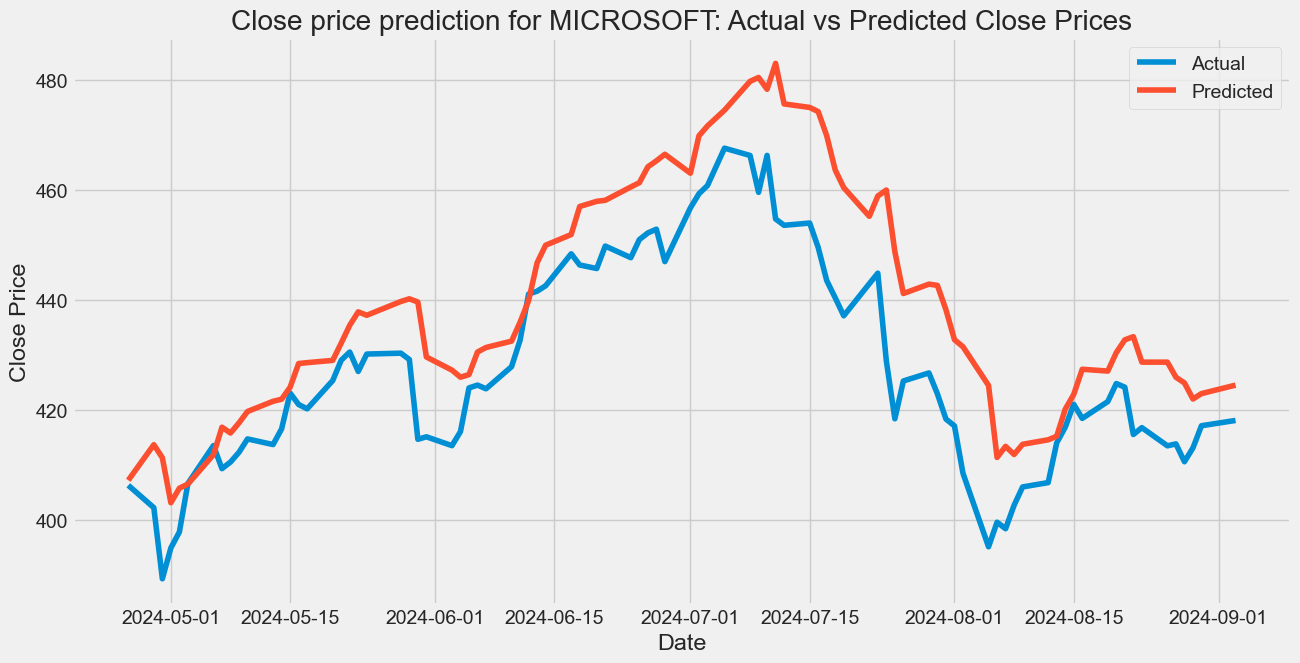



_______________________________ 

 for stock: AMAZON 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1303 - val_loss: 0.0210
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - val_loss: 0.0030
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0003e-04 - val_loss: 0.0013
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.

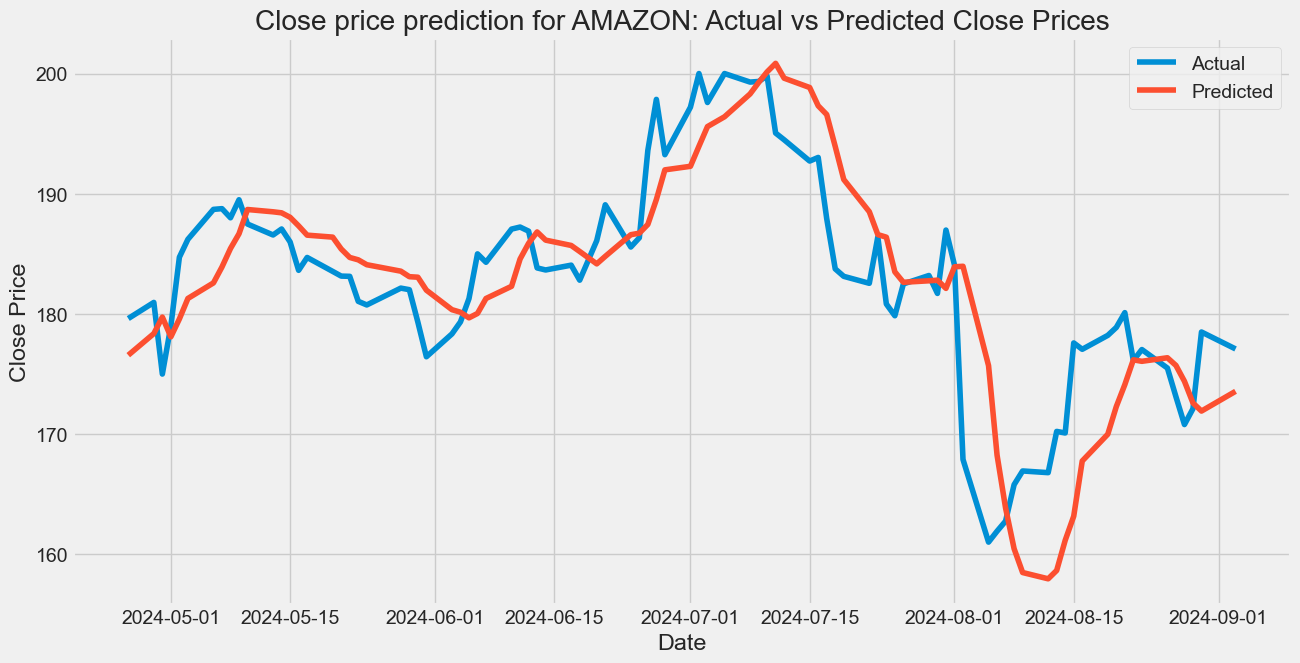



_______________________________ 

 for stock: APPLE 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1237 - val_loss: 0.0505
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - val_loss: 0.0022
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0052
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9978e-04 - val_loss: 9.5834e-04
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5739e-04 - val_loss: 0.0011
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_

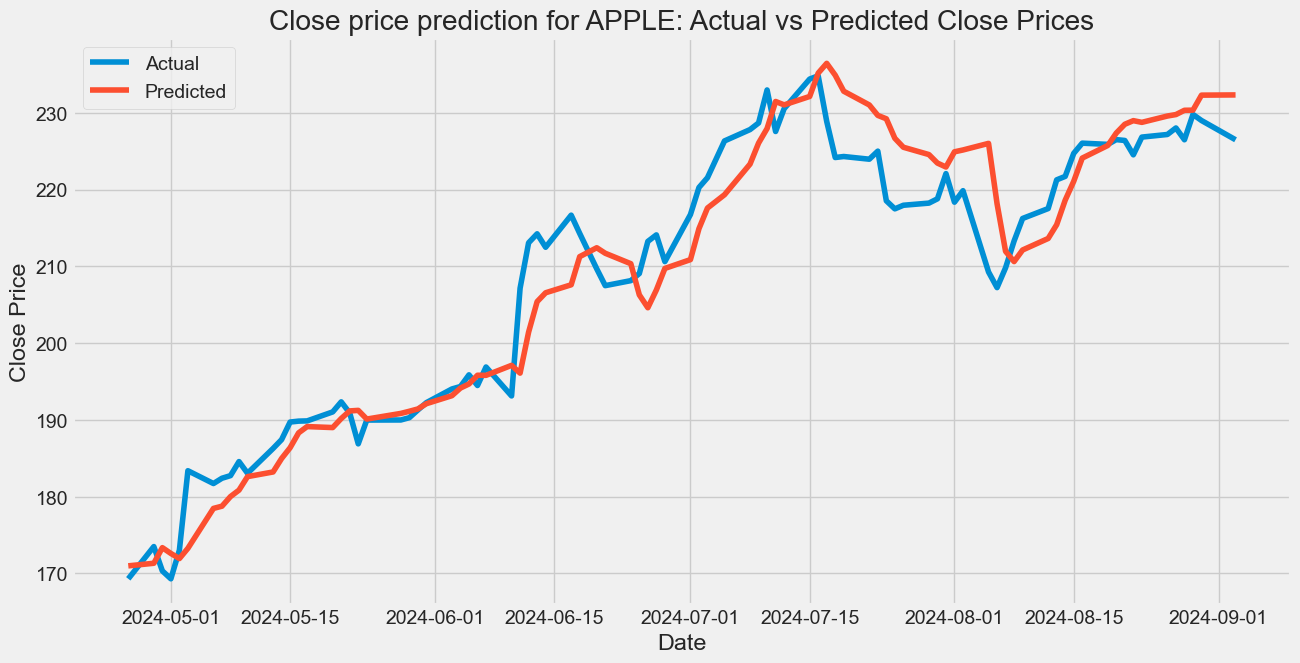



_______________________________ 

 for stock: NVIDIA 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0307 - val_loss: 0.0064
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0100
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3009e-04 - val_loss: 0.0019
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8350e-04 - val_loss: 0.0017
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5183e-04 - val_loss: 0.0024
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6241e-04 - val_loss: 0.0025
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5897e-04 - val_loss: 0.0025
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5495e-04 - val_loss: 0.0024
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6512e-04 - val_loss: 0.0026
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2895e-04 - val_loss: 0.0028
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0763e-04 - val_loss: 0.0021
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

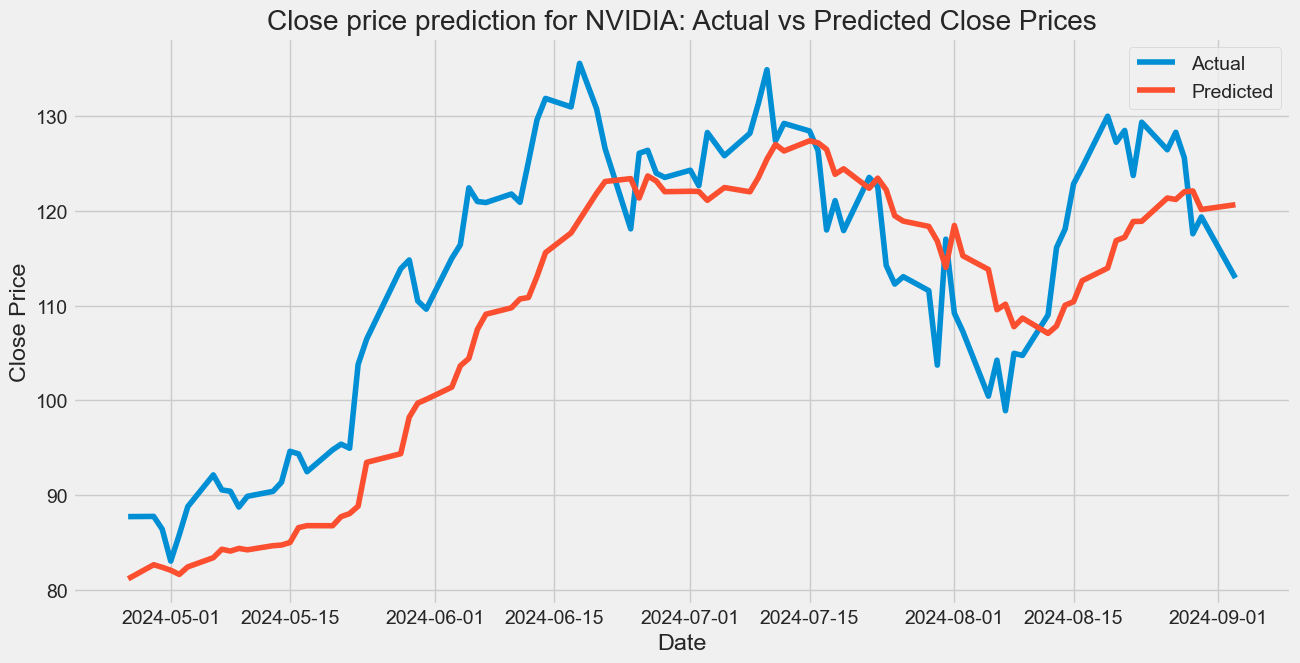



_______________________________ 

 for stock: TESLA 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4130 - val_loss: 0.0048
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278 - val_loss: 0.0052
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - val_loss: 0.0075
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - val_loss: 0.0031
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0024
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0023

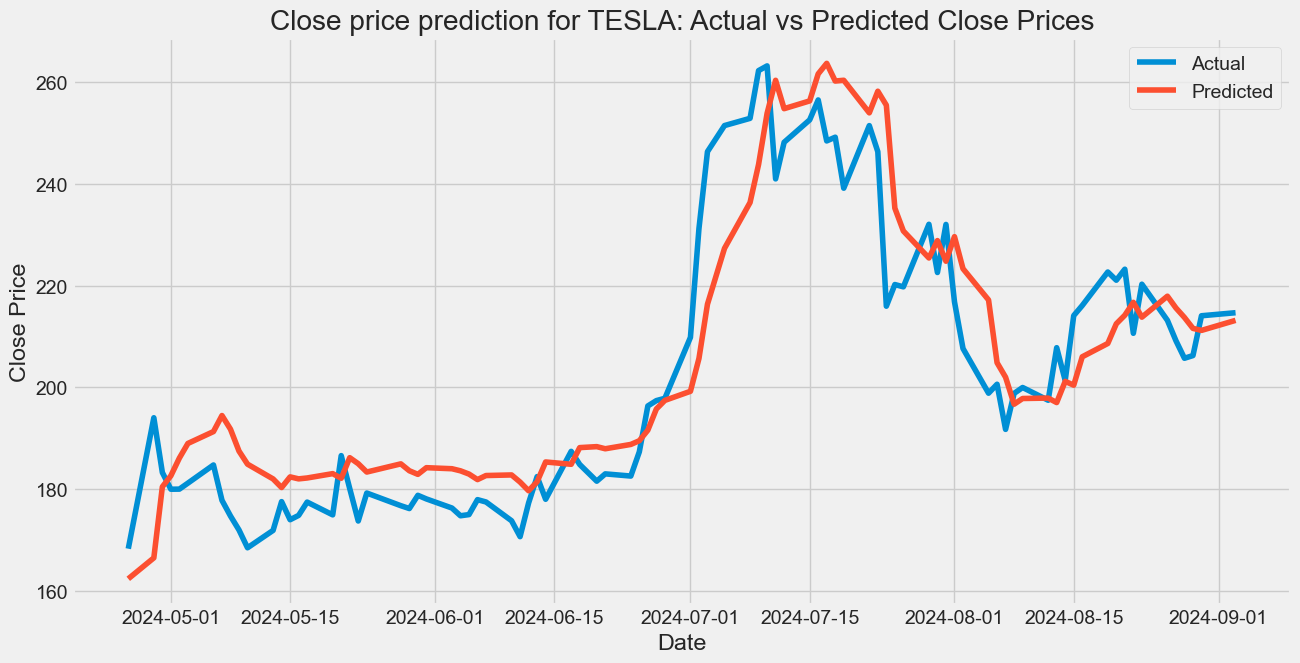



_______________________________ 

 for stock: META 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0173 - val_loss: 0.0058
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5799e-04 - val_loss: 0.0029
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1115e-04 - val_loss: 0.0028
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9920e-04 - val_loss: 0.0028
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3836e-04 - val_loss: 0.0026
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4082e-04 - val_loss: 0.0024
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9306e-04 - val_loss: 0.0023
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2830e-04 - val_loss: 0.0023
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2755e-04 - val_loss: 0.0022
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0849e-04 - val_loss: 0.0022
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8036e-04 - val_loss: 0.0022
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

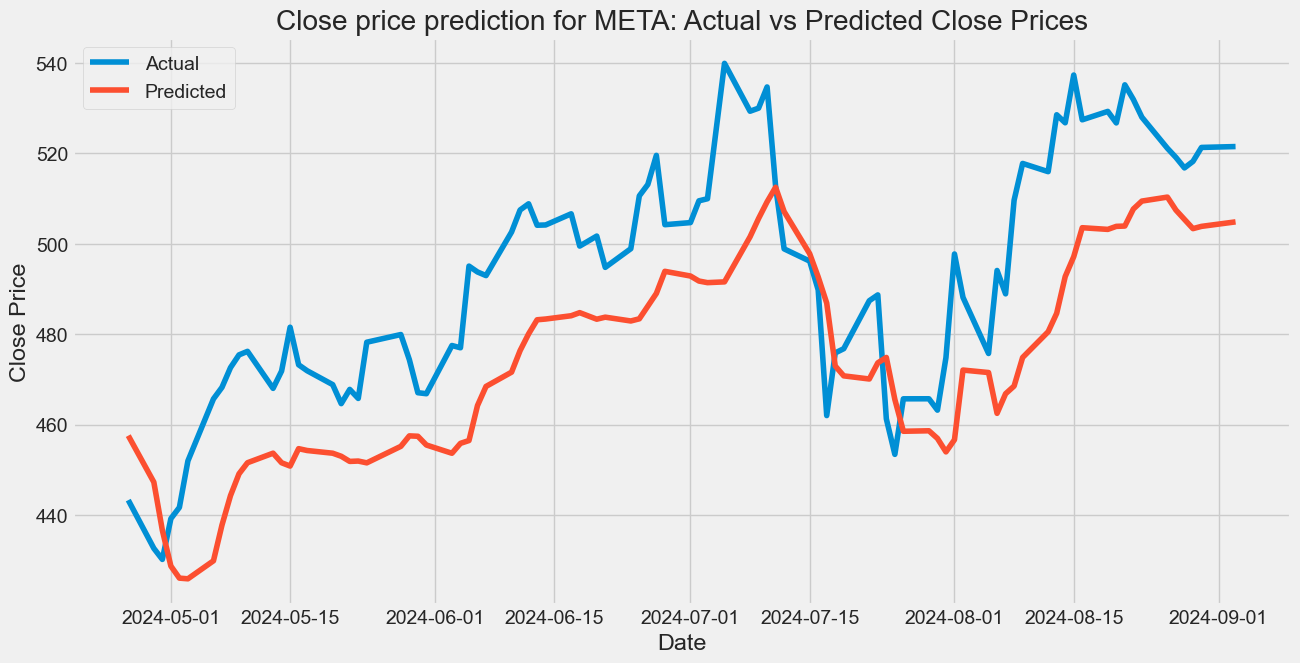



_______________________________ 

 for stock: ORACLE 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1243 - val_loss: 0.0052
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - val_loss: 0.0101
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - val_loss: 0.0046
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 0.0023

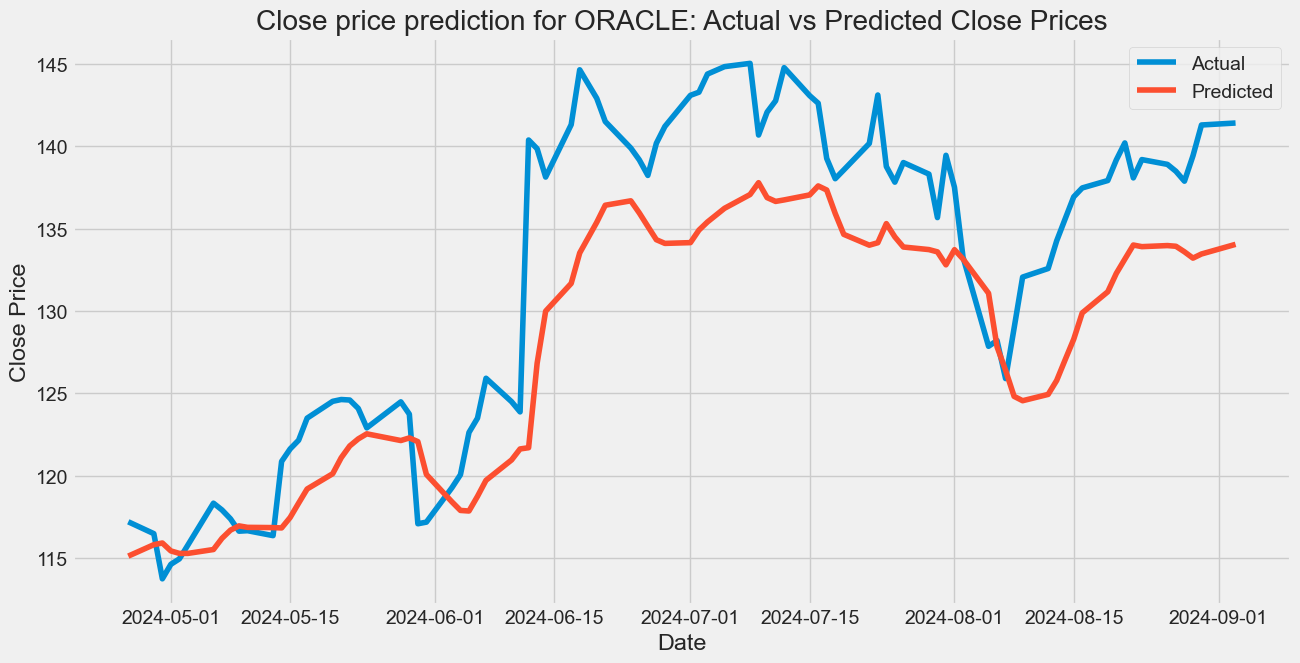



_______________________________ 

 for stock: INTEL 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2159 - val_loss: 0.1537
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - val_loss: 0.0202
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0249
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0291
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0259
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0284
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0272
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0263
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0270
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0301
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 0.0298
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0263

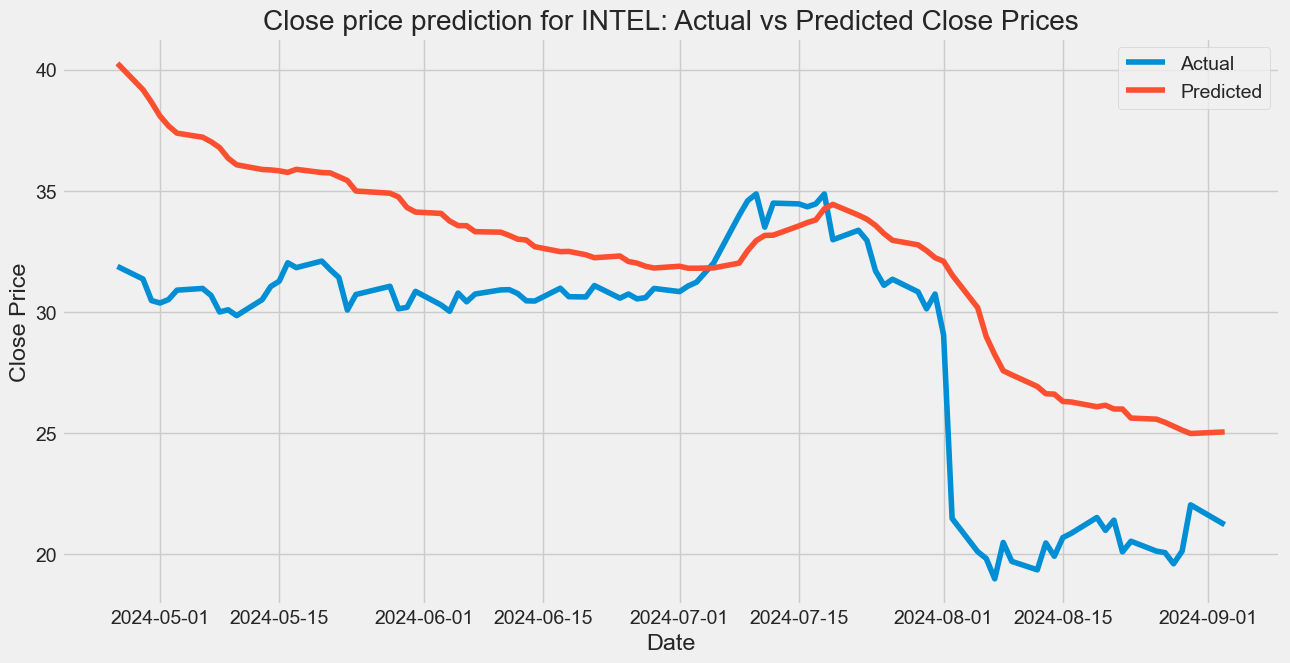



_______________________________ 

 for stock: CISCO 

_______________________________


Epoch 1/20


c:\Users\palaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1010 - val_loss: 0.0234
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0036
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - val_loss: 0.0042
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0032
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0022

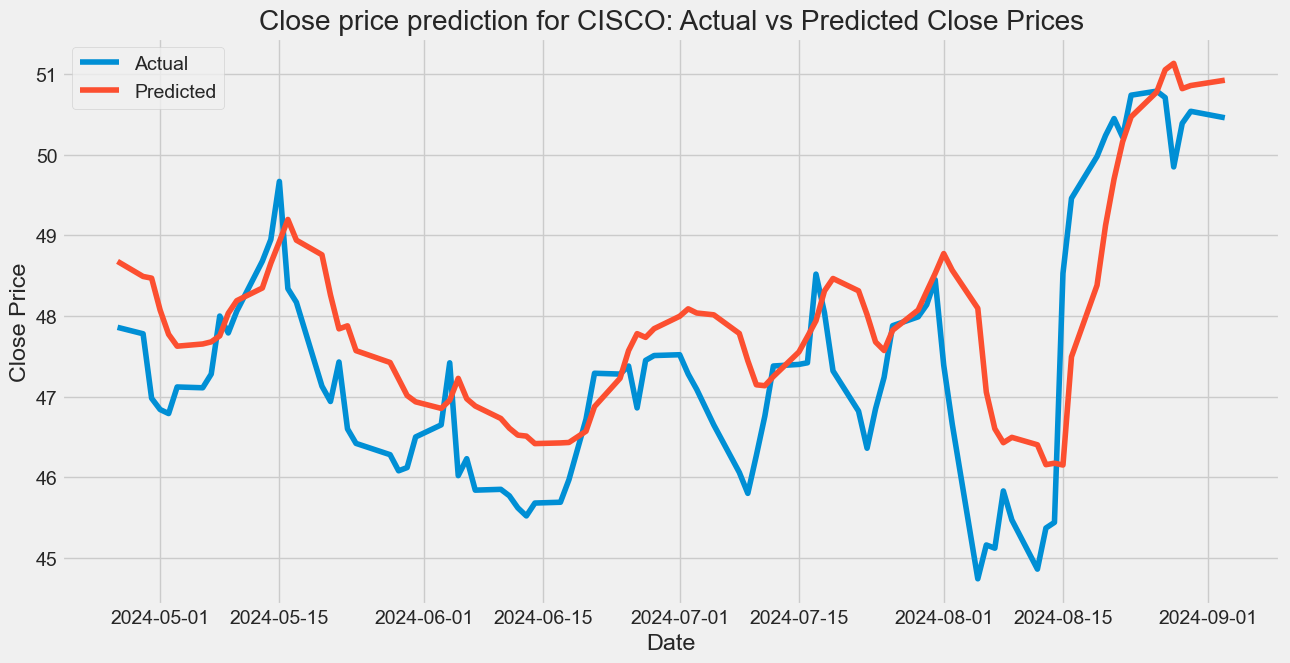

In [30]:
def prepare_and_train_model(df,com_name, time_steps=10):
    # Drop rows with missing values
    df.dropna(inplace=True)
    
    # Separate features and target
    X = df.drop(columns=['Close', 'company_name'])
    Y = df['Close']
    
    # Normalize features and target
    scaler_features = MinMaxScaler()
    scaler_target = MinMaxScaler()
    
    scaled_features = scaler_features.fit_transform(X)
    scaled_target = scaler_target.fit_transform(Y.values.reshape(-1, 1))
    
    # Prepare the dataset
    def create_dataset(features, target, time_steps):
        X, y = [], []
        for i in range(len(features) - time_steps):
            X.append(features[i:(i + time_steps)])
            y.append(target[i + time_steps])
        return np.array(X), np.array(y)
    
    X, y = create_dataset(scaled_features, scaled_target, time_steps)
    
    # Split the dataset
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
    
    # Define the model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(time_steps, X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))
    
    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Rescale back to original values
    y_test_rescaled = scaler_target.inverse_transform(y_test)
    y_pred_rescaled = scaler_target.inverse_transform(y_pred)
    
    # Plot results
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test_rescaled, label='Actual')
    plt.plot(df.index[-len(y_test):], y_pred_rescaled, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Close price prediction for {com_name}: Actual vs Predicted Close Prices')
    plt.legend()
    plt.show()
    
    return model

# Iterate over companies and process each one
for stock_symbol, com_name in zip(company_list, company_name):
    print(f"\n\n_______________________________ \n\n for stock: {com_name} \n\n_______________________________\n\n")
    
    # Create DataFrame for the current company
    df = pd.DataFrame(stock_symbol)
    
    # Prepare, train, and evaluate the model for this company
    model = prepare_and_train_model(df, com_name)